<a href="https://colab.research.google.com/github/lxthames/Neural-FCA/blob/main/Neural%20FCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
#!/bin/bash
!kaggle datasets download bhadramohit/customer-shopping-latest-trends-dataset

Dataset URL: https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset
License(s): Community Data License Agreement - Sharing - Version 1.0
customer-shopping-latest-trends-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip /content/customer-shopping-latest-trends-dataset.zip -d /content

Archive:  /content/customer-shopping-latest-trends-dataset.zip
replace /content/shopping_trends.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/shopping_trends.csv')

# Display the first few rows to get a glimpse of the data
df.head()


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [4]:
# Display general info about the dataset
print(df.info())

# Display basic descriptive statistics (for numerical columns)
print(df.describe())

# Display the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Display unique values for each column (useful for categorical columns)
unique_values = df.nunique()
print("Number of unique values per column:")
print(unique_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [3]:
# Remove the 'Customer ID' column from the dataset
#df = df.drop(columns=['Customer ID'])

# Verify the column is removed
df.head()


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [4]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.cluster import KMeans

# Assuming you already have a dataframe `df` that has been preloaded
df = pd.read_csv('/content/shopping_trends.csv')
# Step 1: Remove Customer ID if it's still present in the dataset
df = df.drop(columns=['Customer ID'], errors='ignore')  # Remove Customer ID column

# Step 2: Define the columns for one-hot encoding, continuous, and KMeans clustering
categorical_columns = ['Size', 'Season','Gender', 'Category', 'Subscription Status', 'Payment Method',
                       'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Frequency of Purchases']

continuous_columns = ['Age', 'Purchase Amount (USD)']

# Step 3: Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Corrected sparse_output instead of sparse
onehot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame from the one-hot encoded columns
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Step 4: Binarize continuous columns using KBinsDiscretizer (Quantile-based binarization)
# Binarizing the continuous columns into two bins
binarizer = KBinsDiscretizer(n_bins=2, encode='onehot', strategy='uniform')
binarized_continuous = binarizer.fit_transform(df[continuous_columns])

# Create a DataFrame for the binarized continuous columns
# Ensure the number of columns in the DataFrame matches the number of bins * continuous columns
binarized_continuous_df = pd.DataFrame(binarized_continuous.toarray(), columns=[f'{col}_bin_{i+1}' for col in continuous_columns for i in range(2)])

# Step 5: Apply KMeans clustering on selected columns (e.g., Item Purchased, Location, Color, Review Rating)
# First, let's encode any categorical columns involved in clustering using one-hot encoding

# Select columns for clustering and apply one-hot encoding to these columns
clustering_columns = ['Item Purchased', 'Location', 'Color', 'Review Rating', 'Previous Purchases', 'Preferred Payment Method']

# Apply OneHotEncoder to the clustering columns
clustering_encoder = OneHotEncoder(drop='first', sparse_output=False)
clustering_encoded = clustering_encoder.fit_transform(df[clustering_columns])

# Create a DataFrame for the encoded clustering columns
clustering_encoded_df = pd.DataFrame(clustering_encoded, columns=clustering_encoder.get_feature_names_out(clustering_columns))

# Now, apply KMeans clustering on the one-hot encoded data of the clustering columns
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 clusters as seen from the unique values in 'KMeans_Cluster'
df['KMeans_Cluster'] = kmeans.fit_predict(clustering_encoded_df)

# Step 6: Merge one-hot encoded columns, binarized continuous columns, and KMeans cluster labels
df_encoded = pd.concat([df.drop(columns=categorical_columns + continuous_columns + clustering_columns, errors='ignore'),
                        onehot_encoded_df, binarized_continuous_df, df['KMeans_Cluster']], axis=1)

# Step 7: Drop any remaining unwanted columns (like original continuous and categorical columns) from the final DataFrame
columns_to_drop = categorical_columns + continuous_columns + clustering_columns  # Drop the original ones

df_final = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Step 8: Remove any duplicate columns if they exist
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

# Step 9: Clean up columns with 'remainder__' if still present (just for clean output)
df_final = df_final.loc[:, ~df_final.columns.str.contains('remainder__')]

# Step 10: Final Check on the resulting dataset
print(df_final.head())
print(f"Shape of final dataset: {df_final.shape}")

# Now `df_final` is ready for further analysis or model training


   KMeans_Cluster  Size_M  Size_S  Size_XL  Season_Spring  Season_Summer  \
0               0     0.0     0.0      0.0            0.0            0.0   
1               3     0.0     0.0      0.0            0.0            0.0   
2               2     0.0     1.0      0.0            1.0            0.0   
3               1     1.0     0.0      0.0            1.0            0.0   
4               1     1.0     0.0      0.0            1.0            0.0   

   Season_Winter  Gender_Male  Category_Clothing  Category_Footwear  ...  \
0            1.0          1.0                1.0                0.0  ...   
1            1.0          1.0                1.0                0.0  ...   
2            0.0          1.0                1.0                0.0  ...   
3            0.0          1.0                0.0                1.0  ...   
4            0.0          1.0                1.0                0.0  ...   

   Frequency of Purchases_Bi-Weekly  Frequency of Purchases_Every 3 Months  \
0       

In [6]:
df_final.head()

KMeans_Cluster  Size_M  Size_S  Size_XL  Season_Spring  Season_Summer  \
0               0     0.0     0.0      0.0            0.0            0.0   
1               3     0.0     0.0      0.0            0.0            0.0   
2               2     0.0     1.0      0.0            1.0            0.0   
3               1     1.0     0.0      0.0            1.0            0.0   
4               1     1.0     0.0      0.0            1.0            0.0   

   Season_Winter  Gender_Male  Category_Clothing  Category_Footwear  ...  \
0            1.0          1.0                1.0                0.0  ...   
1            1.0          1.0                1.0                0.0  ...   
2            0.0          1.0                1.0                0.0  ...   
3            0.0          1.0                0.0                1.0  ...   
4            0.0          1.0                1.0                0.0  ...   

   Frequency of Purchases_Bi-Weekly  Frequency of Purchases_Every 3 Months  \
0                               0.0                                    0.0   
1                               0.0                                    0.0   
2                               0.0                                    0.0   
3                               0.0                                    0.0   
4                               0.0                                    0.0   

   Frequency of Purchases_Fortnightly  Frequency of Purchases_Monthly  \
0                                 1.0                             0.0   
1                                 1.0                             0.0   
2                                 0.0                             0.0   
3                                 0.0                             0.0   
4                                 0.0                             0.0   

   Frequency of Purchases_Quarterly  Frequency of Purchases_Weekly  Age_bin_1  \
0                               0.0                            0.0        0.0   
1                               0.0                            0.0        1.0   
2                               0.0                            1.0        0.0   
3                               0.0                            1.0        1.0   
4                               0.0                            0.0        0.0   

   Age_bin_2  Purchase Amount (USD)_bin_1  Purchase Amount (USD)_bin_2  
0        1.0                          1.0                          0.0  
1        0.0                          0.0                          1.0  
2        1.0                          0.0                          1.0  
3        0.0                          0.0                          1.0  
4        1.0                          1.0                          0.0  

[5 rows x 34 columns]

In [6]:
df_final = df_final.drop(columns=["KMeans_Cluster"])


In [23]:
# Display unique values for each column (useful for categorical columns)
unique_values = df_final.nunique()
print("Number of unique values per column:")
print(unique_values)

Number of unique values per column:
Size_M                                   2
Size_S                                   2
Size_XL                                  2
Season_Spring                            2
Season_Summer                            2
Season_Winter                            2
Gender_Male                              2
Category_Clothing                        2
Category_Footwear                        2
Category_Outerwear                       2
Subscription Status_Yes                  2
Payment Method_Cash                      2
Payment Method_Credit Card               2
Payment Method_Debit Card                2
Payment Method_PayPal                    2
Payment Method_Venmo                     2
Shipping Type_Express                    2
Shipping Type_Free Shipping              2
Shipping Type_Next Day Air               2
Shipping Type_Standard                   2
Shipping Type_Store Pickup               2
Discount Applied_Yes                     2
Promo Code Used_Ye

In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray

In [2]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 26.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 28.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.3 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-egfv2rjw
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-egfv2rjw
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit bd5ae45c74a3fbb6b6ff818476f7651d84313d2a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.7.0-py3-none-any.whl size=11

In [3]:
from dataclasses import dataclass
from typing import List, Tuple, FrozenSet, Set, Dict
import pandas as pd

from fcapy.lattice import ConceptLattice
from fcapy.lattice.formal_concept import FormalConcept
from fcapy.poset import POSet
from fcapy.visualizer.line_layouts import calc_levels

import torch
from sparselinear import SparseLinear


@dataclass(eq=False)
class DisjunctiveNeuron:
    intent: FrozenSet[str]
    level: int

    def __eq__(self, other: 'DisjunctiveNeuron'):
        return self.intent == other.intent and self.level == other.level

    def __lt__(self, other: 'DisjunctiveNeuron'):
        return self.intent & other.intent == other.intent and self.level > other.level

    def __le__(self, other: 'DisjunctiveNeuron'):
        return self < other or self == other

    def __hash__(self):
        return hash((self.intent, self.level))


class ConceptNetwork:
    def __init__(self, poset: POSet, network=None, attributes: Tuple[str] = None, targets: Tuple[str] = None):
        self._poset = poset
        self._network = network
        self._attributes = attributes
        self._targets = targets

    @property
    def poset(self) -> POSet:
        return self._poset

    @property
    def network(self) -> torch.nn.Sequential:
        return self._network

    @property
    def attributes(self) -> Tuple[str]:
        return self._attributes

    @property
    def targets(self):
        return self._targets

    def trace_description(self, description: FrozenSet[str], include_targets: bool = False) -> Set[int]:
        P = self.poset

        tops_activated = [node for node in P.tops if P[node].intent & description == P[node].intent]
        activated_nodes = set(tops_activated)
        for node in tops_activated:
            activated_nodes |= P.descendants(node)
        if not include_targets:
            activated_nodes -= set(P.bottoms)

        return activated_nodes

    @classmethod
    def from_lattice(
            cls,
            lattice: ConceptLattice, best_concepts_indices: List[int],
            targets: Tuple[str]
    ):
        assert lattice.is_monotone, 'The lattice should be monotone'

        targets = tuple(targets)

        attrs_tpl = tuple(lattice[lattice.bottom].intent)
        P = cls._poset_from_best_concepts(lattice[best_concepts_indices], targets, attrs_tpl)
        P = cls._fill_levels(P)
        return cls(P, None, attributes=attrs_tpl, targets=targets)

    def fit(
            self,
            X_df: 'pd.DataFrame[bool]', y: 'pd.Series[bool]',
            loss_fn=torch.nn.CrossEntropyLoss(), nonlinearity=torch.nn.ReLU,
            n_epochs: int = 2000
    ):
        X = torch.tensor(X_df[list(self.attributes)].values).float()
        y = torch.tensor(y.values).long()

        self._network = self._poset_to_network(self.poset, nonlinearity)

        optimizer = torch.optim.Adam(self.network.parameters())

        for t in range(n_epochs):
            optimizer.zero_grad()
            y_pred = self.network(X)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()

    def predict_proba(self, X_df: 'pd.DataFrame[bool]') -> torch.Tensor:
        X = torch.tensor(X_df[list(self.attributes)].values).float()
        return self.network(X)

    def predict(self, X_df: 'pd.DataFrame[bool]') -> torch.Tensor:
        return self.predict_proba(X_df).argmax(1)

    def edge_weights_from_network(self) -> Dict[Tuple[int, int], float]:
        max_level = self.poset[self.poset.bottoms[0]].level
        nodes_per_levels = {lvl: [] for lvl in range(max_level + 1)}
        for node_i, node in enumerate(self.poset):
            nodes_per_levels[node.level].append(node_i)
        nodes_per_levels = [nodes_per_levels[lvl] for lvl in range(max_level + 1)]

        edge_weights = {}
        for layer_i, nodes in enumerate(nodes_per_levels[:-1]):
            next_nodes = nodes_per_levels[layer_i+1]

            nn_layer = self.network[layer_i*2]
            idxs = nn_layer.weight.indices().numpy().T.tolist()
            vals = nn_layer.weight.values().numpy()

            for (child_i, parent_i), v in zip(idxs, vals):
                edge_weights[(nodes[parent_i], next_nodes[child_i])] = v
        return edge_weights

    @staticmethod
    def _poset_from_best_concepts(
            best_concepts: List[FormalConcept], targets: Tuple[str], attrs_tpl: Tuple[str]
    ) -> POSet:
        P_best = POSet(best_concepts)
        lvls = calc_levels(P_best)[0]
        lvls = [lvl + 1 for lvl in lvls]
        target_lvl = max(lvls) + 1

        attrs_set = set(attrs_tpl)

        best_neurons = [DisjunctiveNeuron(frozenset(c.intent), lvl) for c, lvl in zip(P_best, lvls)]
        first_level_neurons = [DisjunctiveNeuron(frozenset({m}), 0) for m in attrs_tpl]
        last_level_neurons = [DisjunctiveNeuron(frozenset({f"y={y}"} | attrs_set), target_lvl) for y in targets]
        return POSet(first_level_neurons + best_neurons + last_level_neurons)

    @staticmethod
    def _fill_levels(poset: POSet) -> POSet:
        nodes_i = sorted(range(len(poset)), key=lambda node_i: poset[node_i].level)
        for node_i in nodes_i:
            children_i = poset.children(node_i)
            if len(children_i) == 0:
                continue

            max_children_level = max([poset[child_i].level for child_i in children_i])
            for lvl in range(poset[node_i].level+1, max_children_level):
                poset.add(DisjunctiveNeuron(poset[node_i].intent, lvl))
        return poset

    @staticmethod
    def _poset_to_network(poset: POSet, nonlinearity: type = torch.nn.ReLU) -> 'torch.nn.Sequential':
        max_level = poset[poset.bottoms[0]].level
        nodes_per_levels = {lvl: [] for lvl in range(max_level + 1)}
        for node_i, node in enumerate(poset):
            nodes_per_levels[node.level].append(node_i)
        nodes_per_levels = [nodes_per_levels[lvl] for lvl in range(max_level + 1)]

        connectivities = []
        for layer_i, layer in enumerate(nodes_per_levels[1:]):
            layer_i += 1
            prev_layer = nodes_per_levels[layer_i - 1]
            layer_con = [(layer.index(node), prev_layer.index(parent))
                         for node in layer for parent in poset.parents(node)]
            connectivities.append(layer_con)

        linear_layers = []
        for layer_i in range(max_level):
            con = torch.tensor(connectivities[layer_i]).T
            layer = SparseLinear(len(nodes_per_levels[layer_i]), len(nodes_per_levels[layer_i + 1]), connectivity=con)
            linear_layers.append(layer)

        layers = [layer for ll in linear_layers for layer in [ll, nonlinearity()]][:-1] + [torch.nn.Softmax(dim=1)]
        model_sparse = torch.nn.Sequential(*layers)
        return model_sparse


def neuron_label_func(el_i: int, P: POSet, M: set, only_new_attrs: bool = True):
    el = P[el_i]

    if len(el.intent - M) > 0:  # if target node
        attrs_to_show = list(el.intent - M)
    else:
        attrs_to_show = set(el.intent)
        if only_new_attrs:
            for parent_i in P.parents(el_i):
                attrs_to_show = attrs_to_show - P[parent_i].intent

        attrs_to_show = list(attrs_to_show)
    return ','.join(attrs_to_show)

In [4]:
import numpy as np
import pandas as pd
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)


In [5]:
import sys

# Add the directory to the system path
sys.path.append('/content')

# Import the module
import neural_lib

# Use the module
print(dir(neural_lib))  # Lists functions and attributes in the module


['ConceptLattice', 'ConceptNetwork', 'Dict', 'DisjunctiveNeuron', 'FormalConcept', 'FrozenSet', 'List', 'POSet', 'Set', 'SparseLinear', 'Tuple', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calc_levels', 'dataclass', 'neuron_label_func', 'pd', 'torch']


In [25]:
df_final.columns

Index(['Size_M', 'Size_S', 'Size_XL', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Gender_Male', 'Category_Clothing',
       'Category_Footwear', 'Category_Outerwear', 'Subscription Status_Yes',
       'Payment Method_Cash', 'Payment Method_Credit Card',
       'Payment Method_Debit Card', 'Payment Method_PayPal',
       'Payment Method_Venmo', 'Shipping Type_Express',
       'Shipping Type_Free Shipping', 'Shipping Type_Next Day Air',
       'Shipping Type_Standard', 'Shipping Type_Store Pickup',
       'Discount Applied_Yes', 'Promo Code Used_Yes',
       'Frequency of Purchases_Bi-Weekly',
       'Frequency of Purchases_Every 3 Months',
       'Frequency of Purchases_Fortnightly', 'Frequency of Purchases_Monthly',
       'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly',
       'Age_bin_1', 'Age_bin_2', 'Purchase Amount (USD)_bin_1',
       'Purchase Amount (USD)_bin_2'],
      dtype='object')

In [29]:
df_final_ = df_final

In [28]:
df_final

Size_M  Size_S  Size_XL  Season_Spring  Season_Summer  Season_Winter  \
0        0.0     0.0      0.0            0.0            0.0            1.0   
1        0.0     0.0      0.0            0.0            0.0            1.0   
2        0.0     1.0      0.0            1.0            0.0            0.0   
3        1.0     0.0      0.0            1.0            0.0            0.0   
4        1.0     0.0      0.0            1.0            0.0            0.0   
...      ...     ...      ...            ...            ...            ...   
3895     0.0     0.0      0.0            0.0            1.0            0.0   
3896     0.0     0.0      0.0            1.0            0.0            0.0   
3897     0.0     0.0      0.0            1.0            0.0            0.0   
3898     0.0     1.0      0.0            0.0            1.0            0.0   
3899     1.0     0.0      0.0            1.0            0.0            0.0   

      Gender_Male  Category_Clothing  Category_Footwear  Category_Outerwear  \
0             1.0                1.0                0.0                 0.0   
1             1.0                1.0                0.0                 0.0   
2             1.0                1.0                0.0                 0.0   
3             1.0                0.0                1.0                 0.0   
4             1.0                1.0                0.0                 0.0   
...           ...                ...                ...                 ...   
3895          0.0                1.0                0.0                 0.0   
3896          0.0                0.0                0.0                 0.0   
3897          0.0                0.0                0.0                 0.0   
3898          0.0                0.0                1.0                 0.0   
3899          0.0                0.0                0.0                 0.0   

      ...  Frequency of Purchases_Bi-Weekly  \
0     ...                               0.0   
1     ...                               0.0   
2     ...                               0.0   
3     ...                               0.0   
4     ...                               0.0   
...   ...                               ...   
3895  ...                               0.0   
3896  ...                               1.0   
3897  ...                               0.0   
3898  ...                               0.0   
3899  ...                               0.0   

      Frequency of Purchases_Every 3 Months  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
3895                                    0.0   
3896                                    0.0   
3897                                    0.0   
3898                                    0.0   
3899                                    0.0   

      Frequency of Purchases_Fortnightly  Frequency of Purchases_Monthly  \
0                                    1.0                             0.0   
1                                    1.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   
...                                  ...                             ...   
3895                                 0.0                             0.0   
3896                                 0.0                             0.0   
3897                                 0.0                             0.0   
3898                                 0.0                             0.0   
3899                                 0.0                             0.0   

      Frequency of Purchases_Quarterly  Frequency of Purchases_Weekly  \
0   

In [10]:
# Set 'Promo Code Used_Yes' as the index without modifying the original DataFrame
df_with_promo_code = df_final.set_index('Promo Code Used_Yes', inplace=False)

# Display the first few rows of the modified DataFrame
df_with_promo_code.head()


Size_M  Size_S  Size_XL  Season_Spring  Season_Summer  \
Promo Code Used_Yes                                                          
1.0                     0.0     0.0      0.0            0.0            0.0   
1.0                     0.0     0.0      0.0            0.0            0.0   
1.0                     0.0     1.0      0.0            1.0            0.0   
1.0                     1.0     0.0      0.0            1.0            0.0   
1.0                     1.0     0.0      0.0            1.0            0.0   

                     Season_Winter  Gender_Male  Category_Clothing  \
Promo Code Used_Yes                                                  
1.0                            1.0          1.0                1.0   
1.0                            1.0          1.0                1.0   
1.0                            0.0          1.0                1.0   
1.0                            0.0          1.0                0.0   
1.0                            0.0          1.0                1.0   

                     Category_Footwear  Category_Outerwear  ...  \
Promo Code Used_Yes                                         ...   
1.0                                0.0                 0.0  ...   
1.0                                0.0                 0.0  ...   
1.0                                0.0                 0.0  ...   
1.0                                1.0                 0.0  ...   
1.0                                0.0                 0.0  ...   

                     Frequency of Purchases_Bi-Weekly  \
Promo Code Used_Yes                                     
1.0                                               0.0   
1.0                                               0.0   
1.0                                               0.0   
1.0                                               0.0   
1.0                                               0.0   

                     Frequency of Purchases_Every 3 Months  \
Promo Code Used_Yes                                          
1.0                                                    0.0   
1.0                                                    0.0   
1.0                                                    0.0   
1.0                                                    0.0   
1.0                                                    0.0   

                     Frequency of Purchases_Fortnightly  \
Promo Code Used_Yes                                       
1.0                                                 1.0   
1.0                                                 1.0   
1.0                                                 0.0   
1.0                                                 0.0   
1.0                                                 0.0   

                     Frequency of Purchases_Monthly  \
Promo Code Used_Yes                                   
1.0                                             0.0   
1.0                                             0.0   
1.0                                             0.0   
1.0                                             0.0   
1.0                                             0.0   

                     Frequency of Purchases_Quarterly  \
Promo Code Used_Yes                                     
1.0                                               0.0   
1.0                                               0.0   
1.0                                               0.0   
1.0                                               0.0   
1.0                                               0.0   

                     Frequency of Purchases_Weekly  Age_bin_1  Age_bin_2  \
Promo Code Used_Yes                                                        
1.0                                            0.0        0.0        1.0   
1.0                                            0.0        1.0        0.0   
1.0                                            1.0        0.0        1.0   
1.0                                            1.0        1.0        0.0   
1.0                   

In [11]:
df_boolean = df_with_promo_code.astype(bool)

# Display the first few rows of the transformed DataFrame
df_boolean.head()


Size_M  Size_S  Size_XL  Season_Spring  Season_Summer  \
Promo Code Used_Yes                                                          
1.0                   False   False    False          False          False   
1.0                   False   False    False          False          False   
1.0                   False    True    False           True          False   
1.0                    True   False    False           True          False   
1.0                    True   False    False           True          False   

                     Season_Winter  Gender_Male  Category_Clothing  \
Promo Code Used_Yes                                                  
1.0                           True         True               True   
1.0                           True         True               True   
1.0                          False         True               True   
1.0                          False         True              False   
1.0                          False         True               True   

                     Category_Footwear  Category_Outerwear  ...  \
Promo Code Used_Yes                                         ...   
1.0                              False               False  ...   
1.0                              False               False  ...   
1.0                              False               False  ...   
1.0                               True               False  ...   
1.0                              False               False  ...   

                     Frequency of Purchases_Bi-Weekly  \
Promo Code Used_Yes                                     
1.0                                             False   
1.0                                             False   
1.0                                             False   
1.0                                             False   
1.0                                             False   

                     Frequency of Purchases_Every 3 Months  \
Promo Code Used_Yes                                          
1.0                                                  False   
1.0                                                  False   
1.0                                                  False   
1.0                                                  False   
1.0                                                  False   

                     Frequency of Purchases_Fortnightly  \
Promo Code Used_Yes                                       
1.0                                                True   
1.0                                                True   
1.0                                               False   
1.0                                               False   
1.0                                               False   

                     Frequency of Purchases_Monthly  \
Promo Code Used_Yes                                   
1.0                                           False   
1.0                                           False   
1.0                                           False   
1.0                                           False   
1.0                                           False   

                     Frequency of Purchases_Quarterly  \
Promo Code Used_Yes                                     
1.0                                             False   
1.0                                             False   
1.0                                             False   
1.0                                             False   
1.0                                             False   

                     Frequency of Purchases_Weekly  Age_bin_1  Age_bin_2  \
Promo Code Used_Yes                                                        
1.0                                          False      False       True   
1.0                                          False       True      False   
1.0                                           True      False       True   
1.0                                           True       True      False   
1.0                   

In [12]:
df_boolean.columns

Index(['Size_M', 'Size_S', 'Size_XL', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Gender_Male', 'Category_Clothing',
       'Category_Footwear', 'Category_Outerwear', 'Subscription Status_Yes',
       'Payment Method_Cash', 'Payment Method_Credit Card',
       'Payment Method_Debit Card', 'Payment Method_PayPal',
       'Payment Method_Venmo', 'Shipping Type_Express',
       'Shipping Type_Free Shipping', 'Shipping Type_Next Day Air',
       'Shipping Type_Standard', 'Shipping Type_Store Pickup',
       'Discount Applied_Yes', 'Frequency of Purchases_Bi-Weekly',
       'Frequency of Purchases_Every 3 Months',
       'Frequency of Purchases_Fortnightly', 'Frequency of Purchases_Monthly',
       'Frequency of Purchases_Quarterly', 'Frequency of Purchases_Weekly',
       'Age_bin_1', 'Age_bin_2', 'Purchase Amount (USD)_bin_1',
       'Purchase Amount (USD)_bin_2'],
      dtype='object')

In [13]:
df_boolean.index = df_boolean.index.astype(str)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report

In [52]:
y_feat = 'Gender_Male'
df_train, df_test = train_test_split(df_boolean, train_size=0.8, random_state=0)

X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.sample()

Size_M  Size_S  Size_XL  Season_Spring  Season_Summer  \
Promo Code Used_Yes                                                          
1.0                   False    True    False          False          False   

                     Season_Winter  Category_Clothing  Category_Footwear  \
Promo Code Used_Yes                                                        
1.0                           True              False              False   

                     Category_Outerwear  Subscription Status_Yes  ...  \
Promo Code Used_Yes                                               ...   
1.0                               False                    False  ...   

                     Frequency of Purchases_Bi-Weekly  \
Promo Code Used_Yes                                     
1.0                                             False   

                     Frequency of Purchases_Every 3 Months  \
Promo Code Used_Yes                                          
1.0                                                  False   

                     Frequency of Purchases_Fortnightly  \
Promo Code Used_Yes                                       
1.0                                                True   

                     Frequency of Purchases_Monthly  \
Promo Code Used_Yes                                   
1.0                                           False   

                     Frequency of Purchases_Quarterly  \
Promo Code Used_Yes                                     
1.0                                             False   

                     Frequency of Purchases_Weekly  Age_bin_1  Age_bin_2  \
Promo Code Used_Yes                                                        
1.0                                          False      False       True   

                     Purchase Amount (USD)_bin_1  Purchase Amount (USD)_bin_2  
Promo Code Used_Yes                                                            
1.0                                         True                        False  

[1 rows x 31 columns]

In [45]:
len(df_reduced_)

50

In [ ]:
# import pandas as pd

# # Assuming you already have df_bin (your dataset) loaded with Customer_ID as index
# # For example:
# # df_bin = pd.read_csv('path_to_your_customer_shopping_data.csv')
# # df_bin.set_index('Customer_ID', inplace=True)  # Set Customer_ID as the index (if it's not already)

# # Define the feature (target) you want to predict
# y_feat = 'Gender_Male'

# # Select a specific Customer ID for testing (replace 'Customer_ID_value' with an actual ID)
# customer_id_test = '1.0'  # Example, replace with the actual ID you want for testing

# # Create the test dataset by selecting the row with the specific Customer ID
# df_test = df_boolean.loc[[customer_id_test]]

# # Create the train dataset by dropping the row with the selected Customer ID
# df_train = df_boolean.drop(df_test.index, axis=0)

# # Verify the split
# print("Test Data (df_test):")
# print(df_test)
# print("\nTrain Data (df_train):")
# print(df_train.head())  # Show first few rows of the train data


In [ ]:
# print("Test Data (df_test):")
# df_test
# print("\nTrain Data (df_train):")
# df_train.head()

In [37]:
df_test

Size_M  Size_S  Size_XL  Season_Spring  Season_Summer  \
Promo Code Used_Yes                                                          
1.0                   False   False    False          False          False   
1.0                   False   False    False          False          False   
1.0                   False    True    False           True          False   
1.0                    True   False    False           True          False   
1.0                    True   False    False           True          False   
...                     ...     ...      ...            ...            ...   
1.0                   False   False    False          False          False   
1.0                    True   False    False          False          False   
1.0                    True   False    False          False          False   
1.0                    True   False    False           True          False   
1.0                    True   False    False          False          False   

                     Season_Winter  Gender_Male  Category_Clothing  \
Promo Code Used_Yes                                                  
1.0                           True         True               True   
1.0                           True         True               True   
1.0                          False         True               True   
1.0                          False         True              False   
1.0                          False         True               True   
...                            ...          ...                ...   
1.0                          False         True              False   
1.0                          False         True               True   
1.0                           True         True              False   
1.0                          False         True               True   
1.0                           True         True              False   

                     Category_Footwear  Category_Outerwear  ...  \
Promo Code Used_Yes                                         ...   
1.0                              False               False  ...   
1.0                              False               False  ...   
1.0                              False               False  ...   
1.0                               True               False  ...   
1.0                              False               False  ...   
...                                ...                 ...  ...   
1.0                               True               False  ...   
1.0                              False               False  ...   
1.0                              False                True  ...   
1.0                              False               False  ...   
1.0                              False               False  ...   

                     Frequency of Purchases_Bi-Weekly  \
Promo Code Used_Yes                                     
1.0                                             False   
1.0                                             False   
1.0                                             False   
1.0                                             False   
1.0                                             False   
...                                               ...   
1.0                                             False   
1.0                                              True   
1.0                                             False   
1.0                                             False   
1.0                                             False   

                     Frequency of Purchases_Every 3 Months  \
Promo Code Used_Yes                                          
1.0                                                  False   
1.0                                                  False   
1.0                                                  False   
1.0                                                  False   
1.0                                                  False   
...                                            

In [44]:
# X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
# X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]

In [53]:
K_train = FormalContext.from_pandas(X_train)
K_train

FormalContext (3120 objects, 31 attributes, 23044 connections)
   |Size_M|Size_S|Size_XL|Season_Spring|Season_Summer|...|Frequency of Purchases_Weekly|Age_bin_1|Age_bin_2|Purchase Amount (USD)_bin_1|Purchase Amount (USD)_bin_2|
1.0|     X|      |       |             |            X|...|                             |        X|         |                           |                          X|
0.0|     X|      |       |             |            X|...|                             |        X|         |                          X|                           |
1.0|      |     X|       |             |             |...|                             |         |        X|                          X|                           |
0.0|     X|      |       |            X|             |...|                             |         |        X|                          X|                           |
1.0|      |      |       |             |             |...|                             |         |        X|    

In [54]:
L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)
len(L)

96

In [55]:
from sklearn.metrics import f1_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

In [56]:
n_concepts = 4
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [59]:
import neural_lib as nl

In [76]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))


In [77]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')


In [62]:
set(X_train.columns)


{'Age_bin_1',
 'Age_bin_2',
 'Category_Clothing',
 'Category_Footwear',
 'Category_Outerwear',
 'Discount Applied_Yes',
 'Frequency of Purchases_Bi-Weekly',
 'Frequency of Purchases_Every 3 Months',
 'Frequency of Purchases_Fortnightly',
 'Frequency of Purchases_Monthly',
 'Frequency of Purchases_Quarterly',
 'Frequency of Purchases_Weekly',
 'Payment Method_Cash',
 'Payment Method_Credit Card',
 'Payment Method_Debit Card',
 'Payment Method_PayPal',
 'Payment Method_Venmo',
 'Purchase Amount (USD)_bin_1',
 'Purchase Amount (USD)_bin_2',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter',
 'Shipping Type_Express',
 'Shipping Type_Free Shipping',
 'Shipping Type_Next Day Air',
 'Shipping Type_Standard',
 'Shipping Type_Store Pickup',
 'Size_M',
 'Size_S',
 'Size_XL',
 'Subscription Status_Yes'}

In [78]:
descr = {'Payment Method_Cash','Season_Summer','Season_Winter','Season_Spring','Frequency of Purchases_Bi-Weekly'}

traced = cn.trace_description(descr, include_targets=False)

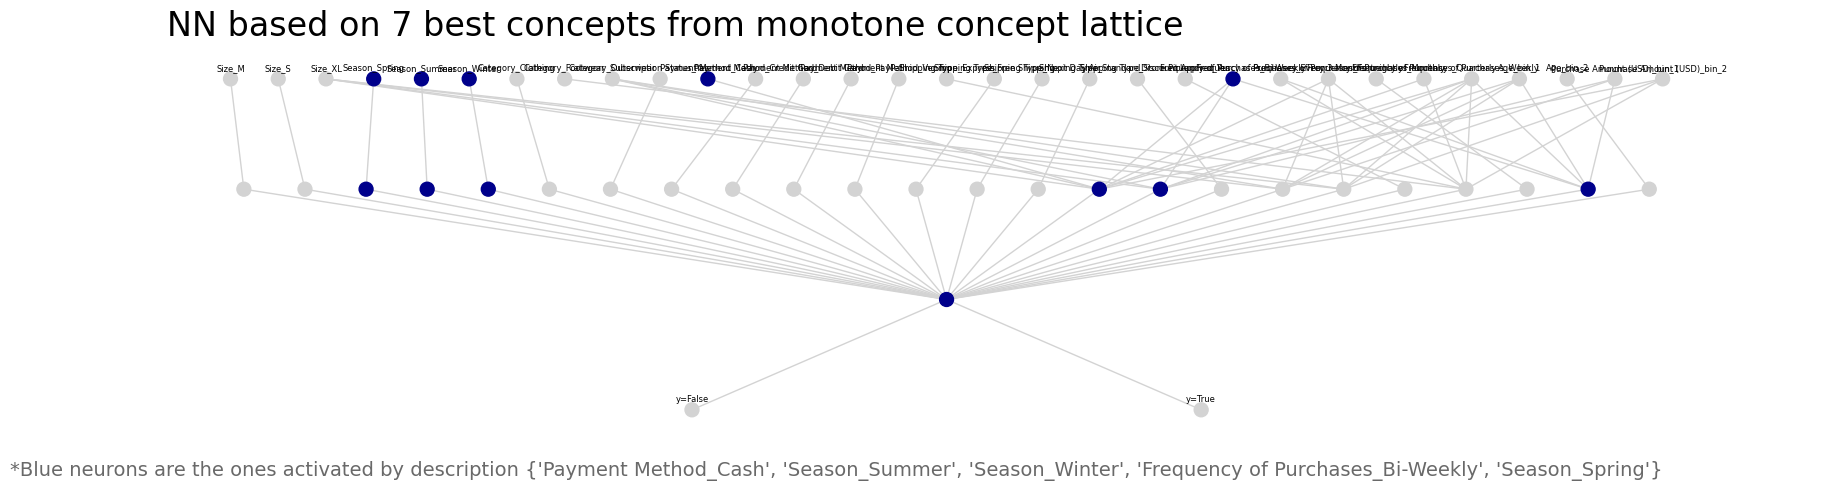

In [81]:
fig, ax = plt.subplots(figsize=(20,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))
                ],
               node_size=100,
               node_label_font_size=6
)
plt.title(f'NN based on '+str(n_concepts)+' best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3, f'*Blue neurons are the ones activated by description {descr}', fontsize=14, ha='right', color='dimgray')

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('nn_g_and_b.png')
plt.show()

In [82]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [83]:
cn.fit(X_train, y_train,  n_epochs = 5000)

In [84]:
y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

Class prediction [0 1 1 0 1 1 1 1 1 0]
Class prediction with probabilities [[0.70214236 0.2978576 ]
 [0.00879655 0.9912034 ]
 [0.00879655 0.9912034 ]
 [0.60559094 0.3944091 ]
 [0.00879655 0.9912034 ]
 [0.00879655 0.9912034 ]
 [0.00879655 0.9912034 ]
 [0.4807276  0.5192723 ]
 [0.00879655 0.9912034 ]
 [0.59771687 0.40228322]]
True class [ True  True  True False  True  True  True False  True  True]


In [85]:
#5000 (run few times)
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1     score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 0.7394636015325671
F1     score: 0.7885597548518897
Accuracy score: 0.7346153846153847


In [86]:
print(classification_report(y_test.values.astype('int'), y_pred))

              precision    recall  f1-score   support

           0       0.58      0.72      0.64       258
           1       0.84      0.74      0.79       522

    accuracy                           0.73       780
   macro avg       0.71      0.73      0.72       780
weighted avg       0.76      0.73      0.74       780



In [70]:
#10 000
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs = 10000)
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print('F1     score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Recall score: 0.9655172413793104
F1     score: 0.7937007874015748
Accuracy score: 0.6641025641025641


In [71]:
from sklearn.metrics import f1_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

In [72]:
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:7])

assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [73]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [74]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

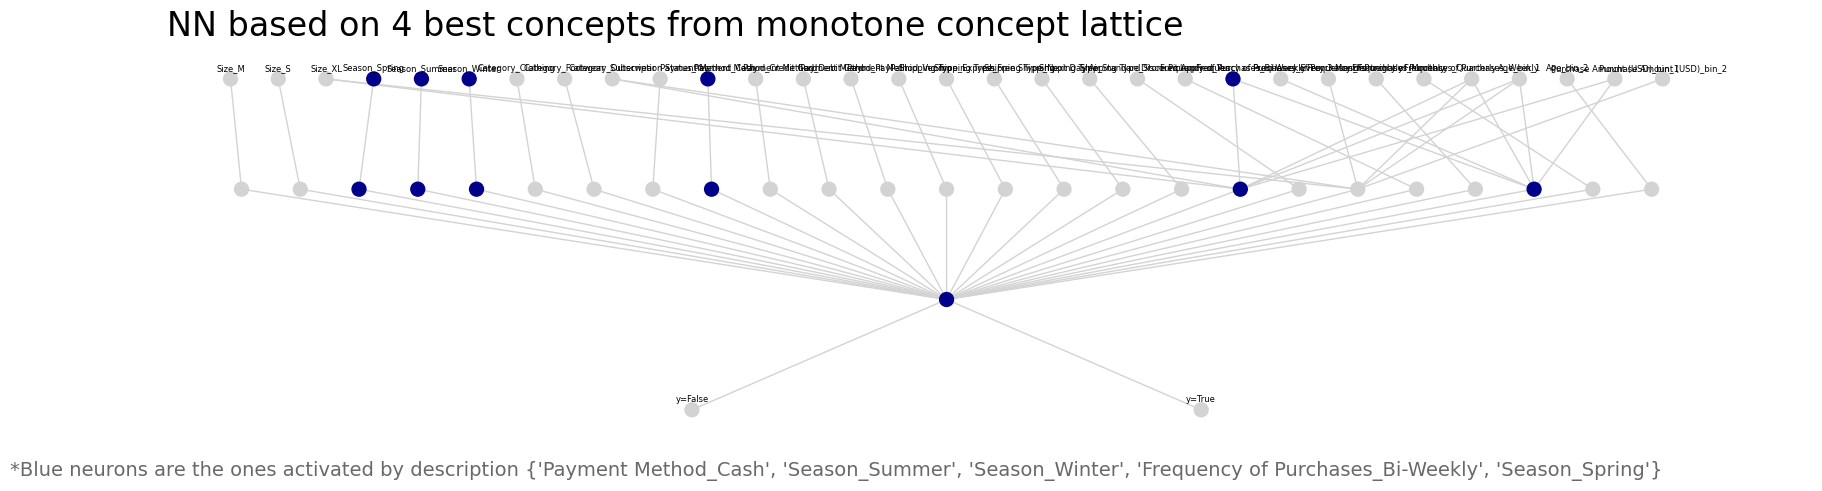


### Results for n_concepts=4, n_epochs=5000 ###

Class prediction: [1 1 1 1 1 1 1 1 1 1]
Class prediction with probabilities: [[2.3722707e-01 7.6277298e-01]
 [5.9849035e-02 9.4015098e-01]
 [1.5245719e-01 8.4754276e-01]
 [3.3444408e-02 9.6655554e-01]
 [5.7370838e-02 9.4262922e-01]
 [3.2870418e-01 6.7129582e-01]
 [9.4960414e-02 9.0503955e-01]
 [2.9461537e-04 9.9970537e-01]
 [2.8987315e-02 9.7101271e-01]
 [1.7216044e-02 9.8278391e-01]]
True class: [ True  True  True False  True  True  True False  True  True]
Recall score: 0.975095785440613
              precision    recall  f1-score   support

           0       0.07      0.00      0.01       258
           1       0.66      0.98      0.79       522

    accuracy                           0.65       780
   macro avg       0.37      0.49      0.40       780
weighted avg       0.47      0.65      0.53       780

F1 score: 0.7903726708074534
Accuracy score: 0.6538461538461539


In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl

# Description for tracing
descr = {'Payment Method_Cash', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'Frequency of Purchases_Bi-Weekly'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 4
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

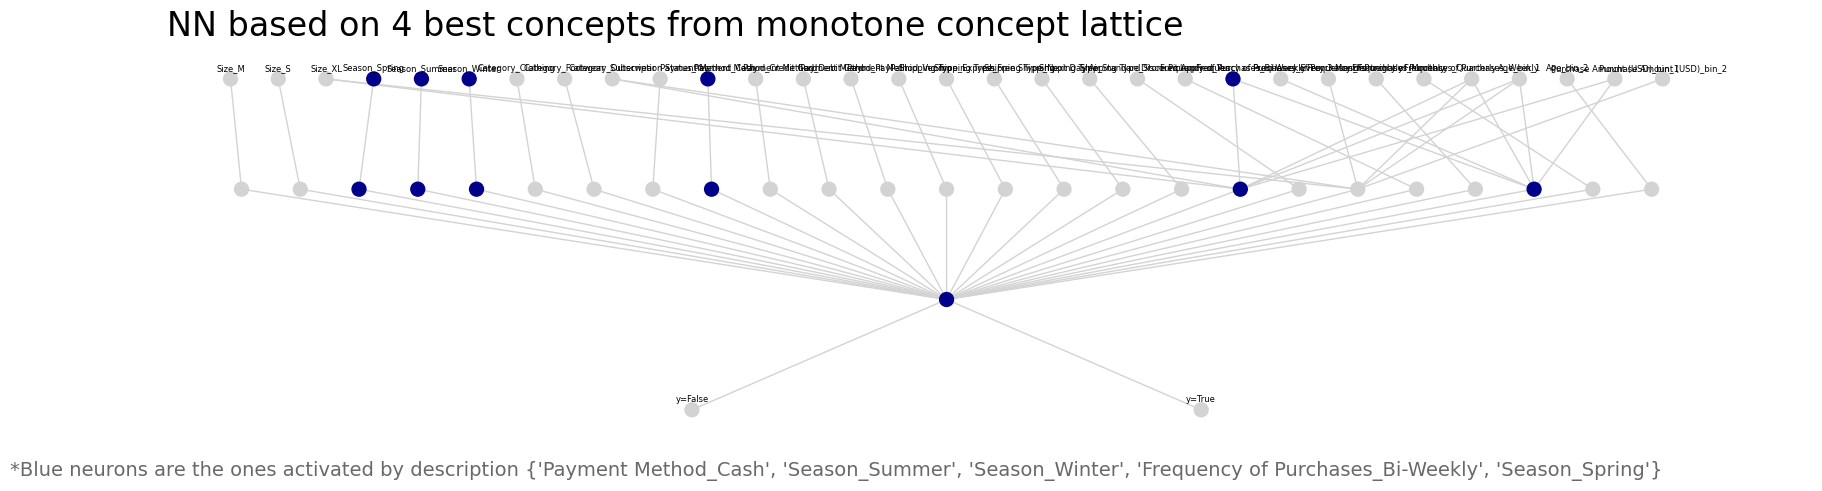


### Results for n_concepts=4, n_epochs=3000 ###

Class prediction: [1 1 1 1 1 1 1 1 1 1]
Class prediction with probabilities: [[0.12389799 0.876102  ]
 [0.12389799 0.876102  ]
 [0.12389799 0.876102  ]
 [0.12389799 0.876102  ]
 [0.12389799 0.876102  ]
 [0.12389799 0.876102  ]
 [0.12389799 0.876102  ]
 [0.12389799 0.876102  ]
 [0.12389799 0.876102  ]
 [0.12389799 0.876102  ]]
True class: [ True  True  True False  True  True  True False  True  True]
Recall score: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.67      1.00      0.80       522

    accuracy                           0.67       780
   macro avg       0.33      0.50      0.40       780
weighted avg       0.45      0.67      0.54       780

F1 score: 0.8018433179723502
Accuracy score: 0.6692307692307692


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl

# Description for tracing
descr = {'Payment Method_Cash', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'Frequency of Purchases_Bi-Weekly'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 4
n_epochs = 3000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

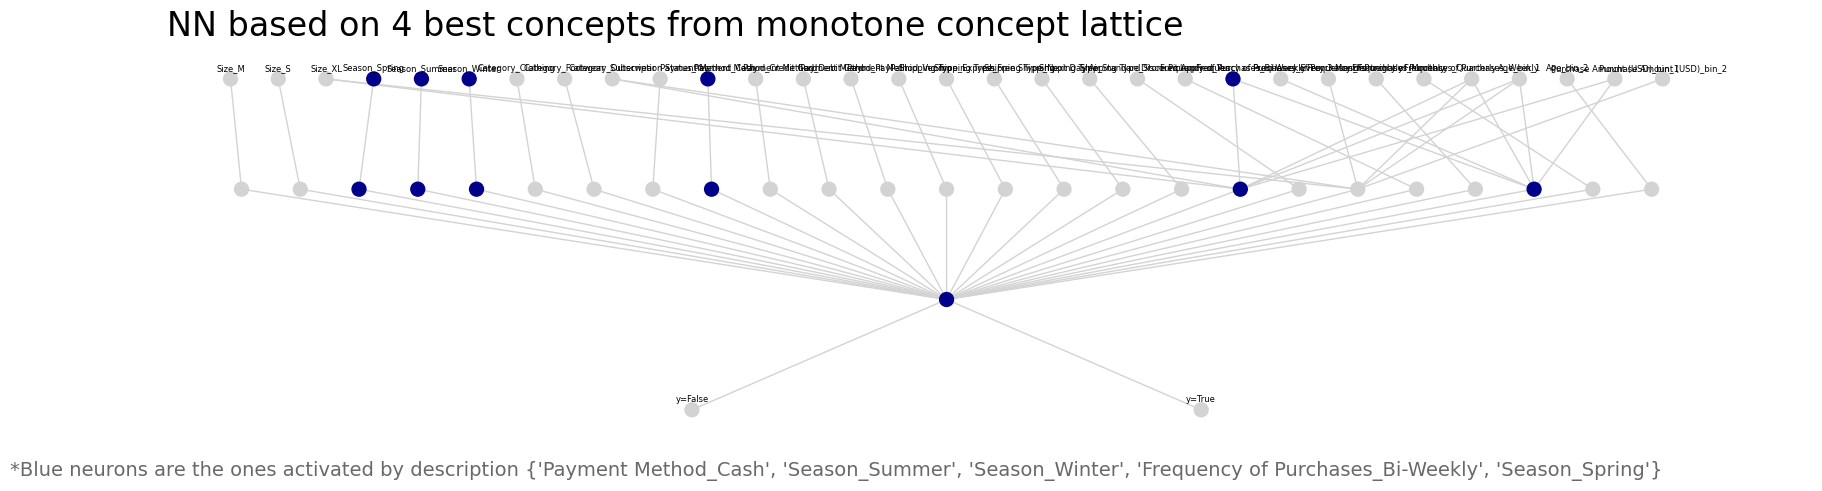


### Results for n_concepts=4, n_epochs=5000 ###

Class prediction: [0 1 1 0 1 1 1 0 1 0]
Class prediction with probabilities: [[6.5188354e-01 3.4811652e-01]
 [9.3034425e-05 9.9990690e-01]
 [1.1166565e-04 9.9988830e-01]
 [6.5188354e-01 3.4811652e-01]
 [1.0469642e-04 9.9989533e-01]
 [1.8198584e-04 9.9981803e-01]
 [9.1739312e-05 9.9990821e-01]
 [6.5188354e-01 3.4811652e-01]
 [2.8528197e-05 9.9997151e-01]
 [6.1795229e-01 3.8204774e-01]]
True class: [ True  True  True False  True  True  True False  True  True]
Recall score: 0.7088122605363985
              precision    recall  f1-score   support

           0       0.60      0.87      0.71       258
           1       0.92      0.71      0.80       522

    accuracy                           0.76       780
   macro avg       0.76      0.79      0.75       780
weighted avg       0.81      0.76      0.77       780

F1 score: 0.7991360691144709
Accuracy score: 0.7615384615384615


In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl

# Description for tracing
descr = {'Payment Method_Cash', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'Frequency of Purchases_Bi-Weekly'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 4
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

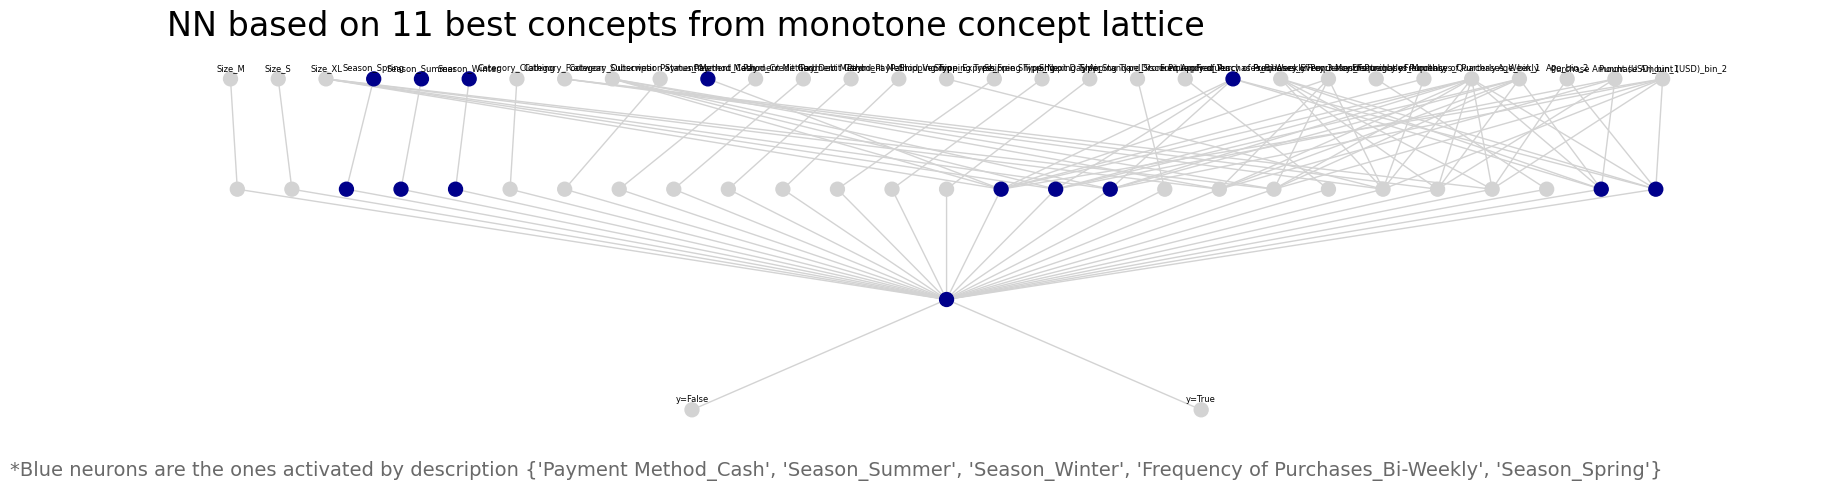


### Results for n_concepts=11, n_epochs=5000 ###

Class prediction: [1 1 1 1 1 1 1 1 1 1]
Class prediction with probabilities: [[0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]
 [0.11691388 0.8830861 ]]
True class: [ True  True  True False  True  True  True False  True  True]
Recall score: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.67      1.00      0.80       522

    accuracy                           0.67       780
   macro avg       0.33      0.50      0.40       780
weighted avg       0.45      0.67      0.54       780

F1 score: 0.8018433179723502
Accuracy score: 0.6692307692307692


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl

# Description for tracing
descr = {'Payment Method_Cash', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'Frequency of Purchases_Bi-Weekly'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 11
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

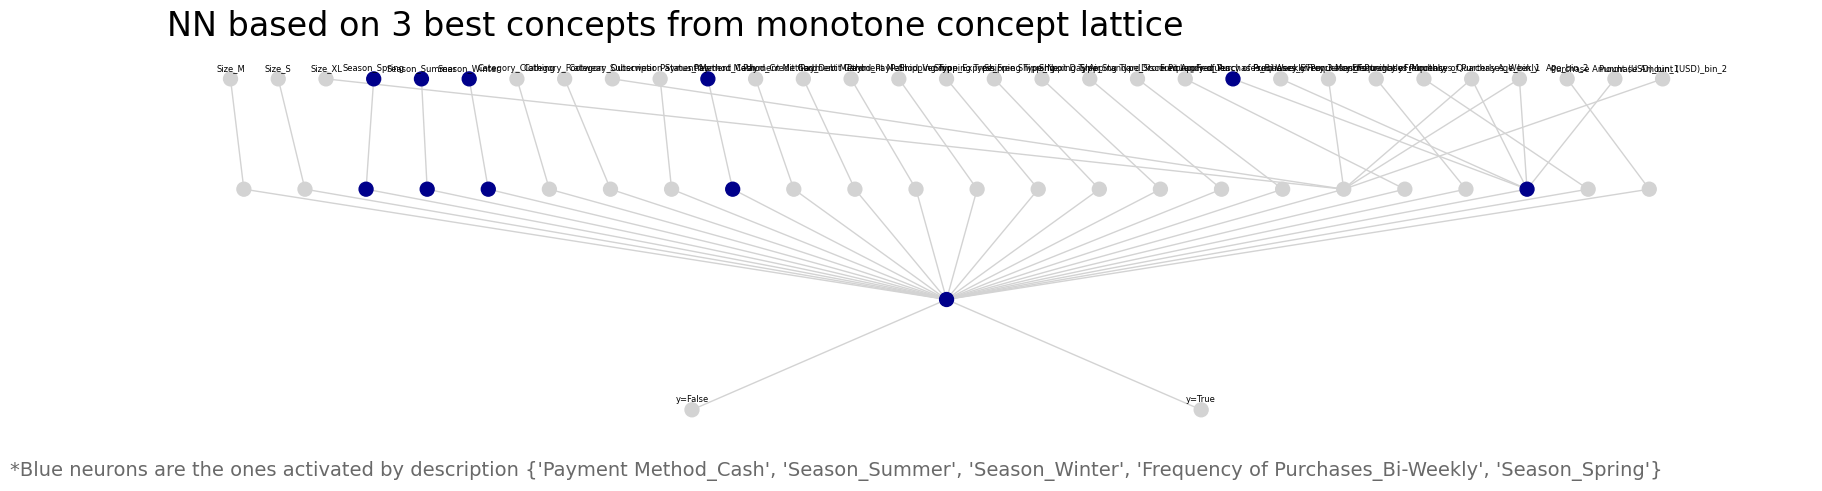


### Results for n_concepts=3, n_epochs=5000 ###

Class prediction: [0 1 1 1 1 1 1 1 1 0]
Class prediction with probabilities: [[6.0265058e-01 3.9734945e-01]
 [7.8967441e-04 9.9921024e-01]
 [9.5066069e-05 9.9990487e-01]
 [4.6154490e-01 5.3845519e-01]
 [4.8049737e-05 9.9995196e-01]
 [3.0832572e-04 9.9969172e-01]
 [6.7100562e-05 9.9993289e-01]
 [2.5999674e-01 7.4000323e-01]
 [5.4417644e-04 9.9945587e-01]
 [6.8164587e-01 3.1835413e-01]]
True class: [ True  True  True False  True  True  True False  True  True]
Recall score: 0.7203065134099617
              precision    recall  f1-score   support

           0       0.59      0.80      0.68       258
           1       0.88      0.72      0.79       522

    accuracy                           0.75       780
   macro avg       0.73      0.76      0.73       780
weighted avg       0.78      0.75      0.75       780

F1 score: 0.791578947368421
Accuracy score: 0.7461538461538462


In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl

# Description for tracing
descr = {'Payment Method_Cash', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'Frequency of Purchases_Bi-Weekly'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 3
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

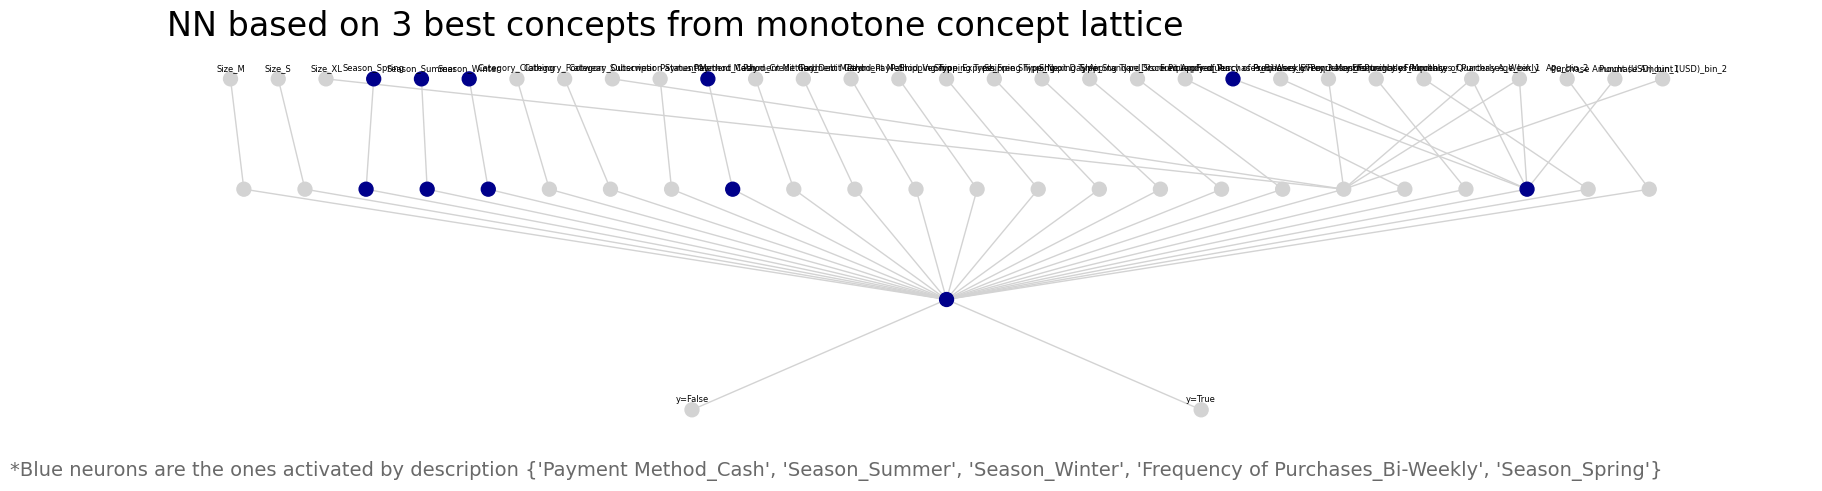


### Results for n_concepts=3, n_epochs=1000 ###

Class prediction: [1 1 1 1 1 1 1 1 1 1]
Class prediction with probabilities: [[0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]
 [0.20664664 0.7933533 ]]
True class: [ True  True  True False  True  True  True False  True  True]
Recall score: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.67      1.00      0.80       522

    accuracy                           0.67       780
   macro avg       0.33      0.50      0.40       780
weighted avg       0.45      0.67      0.54       780

F1 score: 0.8018433179723502
Accuracy score: 0.6692307692307692


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl

# Description for tracing
descr = {'Payment Method_Cash', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'Frequency of Purchases_Bi-Weekly'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 3
n_epochs = 1000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

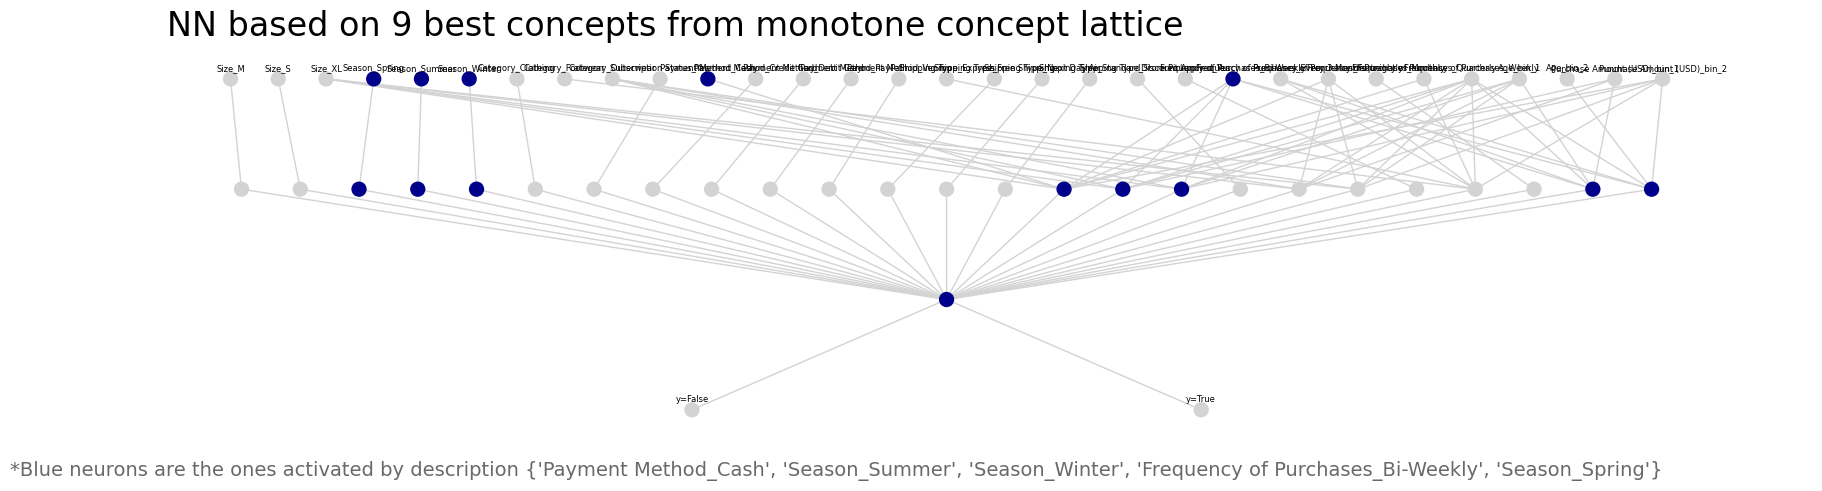


### Results for n_concepts=9, n_epochs=5000 ###

Class prediction: [0 1 1 0 1 1 1 1 1 1]
Class prediction with probabilities: [[5.1387286e-01 4.8612708e-01]
 [8.1315801e-02 9.1868418e-01]
 [7.6170022e-06 9.9999237e-01]
 [5.1387286e-01 4.8612708e-01]
 [1.5748830e-06 9.9999845e-01]
 [1.3495672e-05 9.9998653e-01]
 [1.3246255e-04 9.9986756e-01]
 [1.7014404e-01 8.2985598e-01]
 [1.3891616e-06 9.9999857e-01]
 [3.9466164e-01 6.0533845e-01]]
True class: [ True  True  True False  True  True  True False  True  True]
Recall score: 0.7605363984674329
              precision    recall  f1-score   support

           0       0.49      0.46      0.47       258
           1       0.74      0.76      0.75       522

    accuracy                           0.66       780
   macro avg       0.61      0.61      0.61       780
weighted avg       0.66      0.66      0.66       780

F1 score: 0.7504725897920604
Accuracy score: 0.6615384615384615


In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl

# Description for tracing
descr = {'Payment Method_Cash', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'Frequency of Purchases_Bi-Weekly'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 9
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

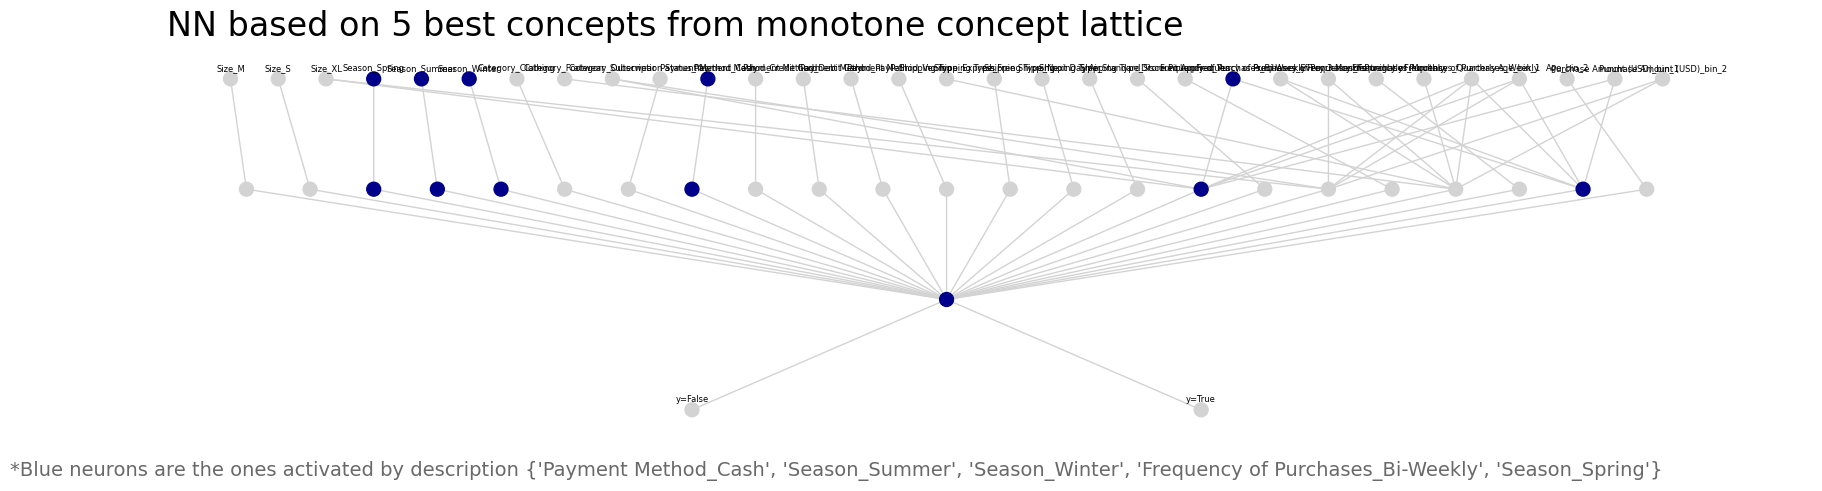


### Results for n_concepts=5, n_epochs=5000 ###

Class prediction: [1 1 1 1 1 1 1 1 1 1]
Class prediction with probabilities: [[0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]
 [0.11822251 0.8817775 ]]
True class: [ True  True  True False  True  True  True False  True  True]
Recall score: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.67      1.00      0.80       522

    accuracy                           0.67       780
   macro avg       0.33      0.50      0.40       780
weighted avg       0.45      0.67      0.54       780

F1 score: 0.8018433179723502
Accuracy score: 0.6692307692307692


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl

# Description for tracing
descr = {'Payment Method_Cash', 'Season_Summer', 'Season_Winter', 'Season_Spring', 'Frequency of Purchases_Bi-Weekly'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 5
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

In [48]:
!pip install catboost



=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       336
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170



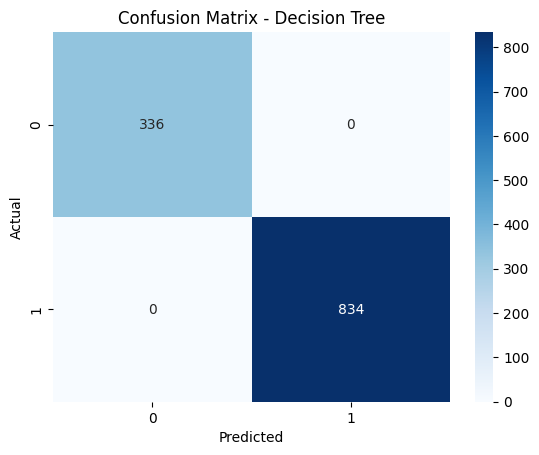

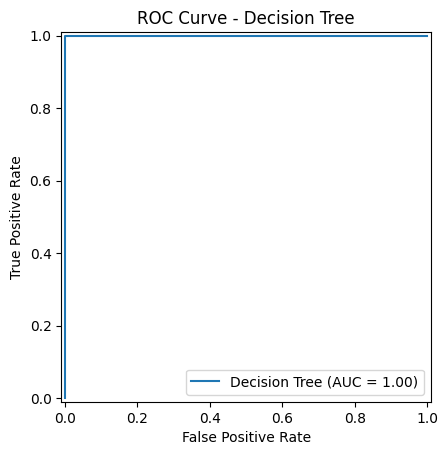


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       336
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170



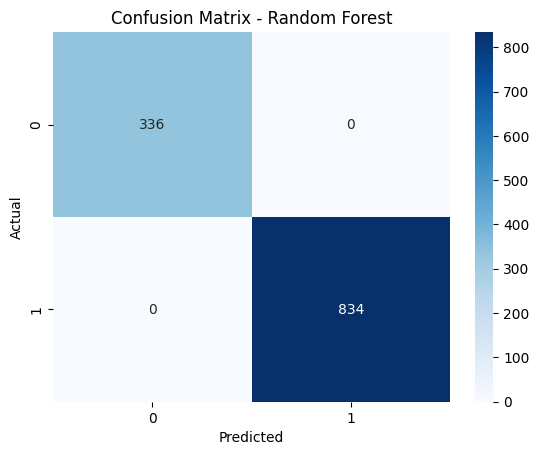

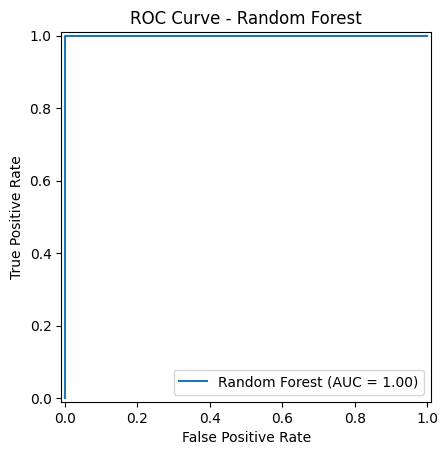


=== XGBoost ===


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:17:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       336
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1170
   macro avg       0.99      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170



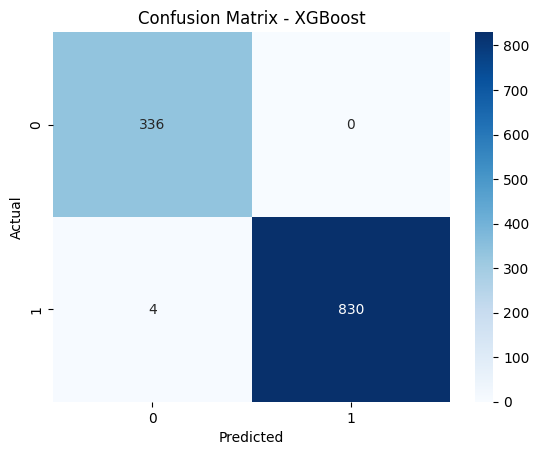

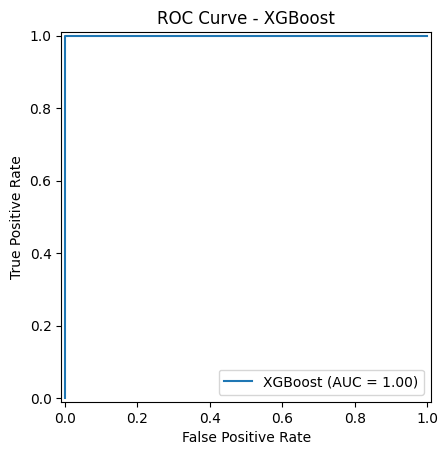


=== CatBoost ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       336
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1170
   macro avg       1.00      1.00      1.00      1170
weighted avg       1.00      1.00      1.00      1170



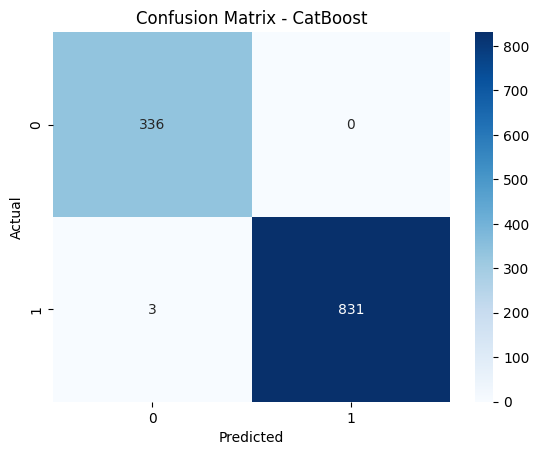

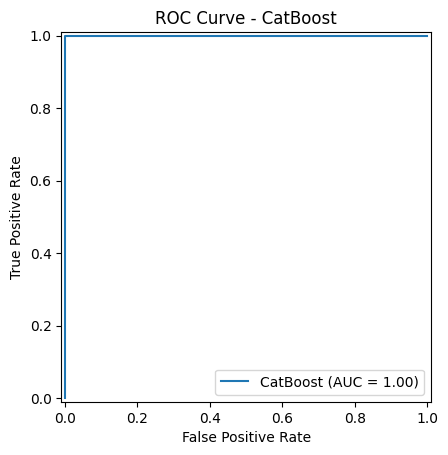


=== KNN ===
              precision    recall  f1-score   support

           0       0.46      0.34      0.39       336
           1       0.76      0.84      0.80       834

    accuracy                           0.70      1170
   macro avg       0.61      0.59      0.60      1170
weighted avg       0.67      0.70      0.68      1170



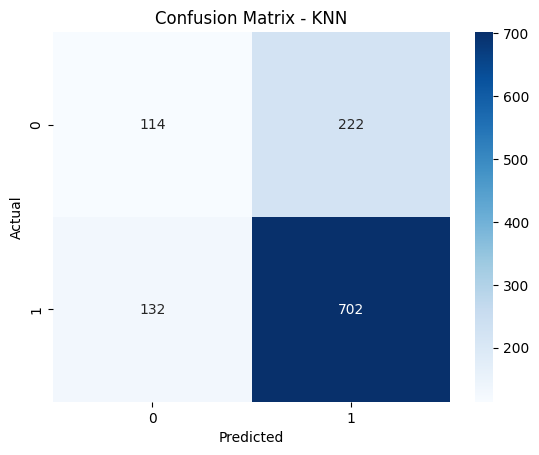

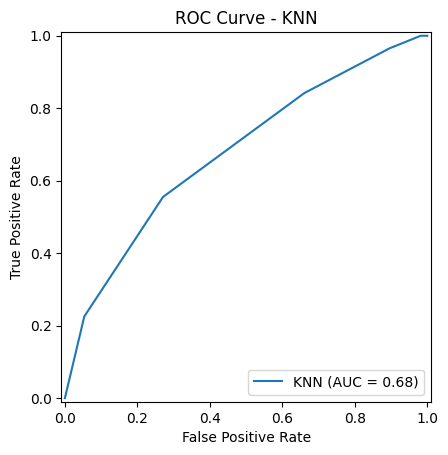


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       336
           1       1.00      0.64      0.78       834

    accuracy                           0.74      1170
   macro avg       0.76      0.82      0.74      1170
weighted avg       0.86      0.74      0.76      1170



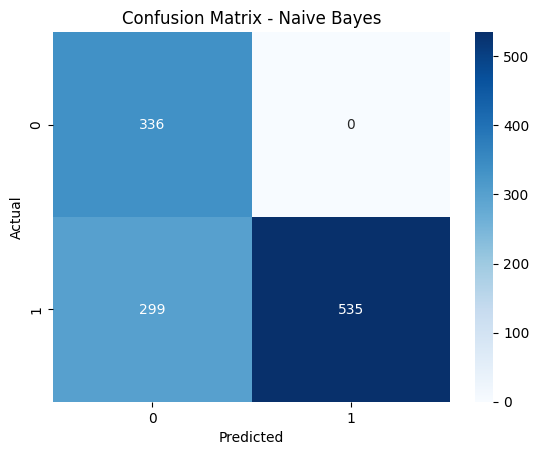

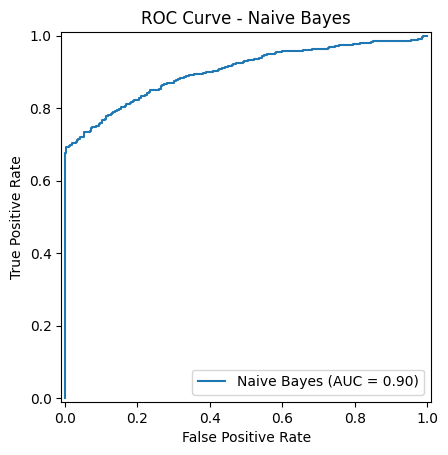


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       336
           1       0.99      0.98      0.99       834

    accuracy                           0.98      1170
   macro avg       0.98      0.98      0.98      1170
weighted avg       0.98      0.98      0.98      1170



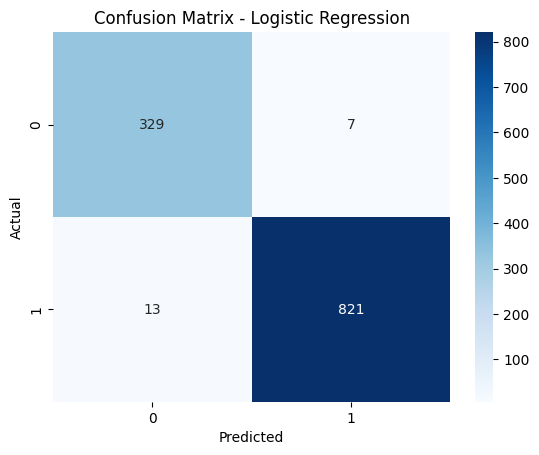

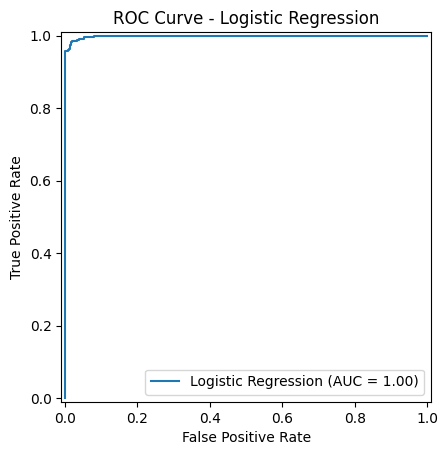

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/shopping_trends.csv')

# Preprocessing
# Assume the target column is named 'Target' and others are features
target_column = 'Gender'  # Replace with the actual target column name
X = df.drop(columns=[target_column])
y = df[target_column]

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features (for KNN, Logistic Regression, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifiers to evaluate
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    if name in ["KNN", "Naive Bayes", "Logistic Regression"]:
        # Use scaled data for these models
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_proba = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None
    else:
        # Use raw data for others
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Classification report
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot()
        plt.title(f"ROC Curve - {name}")
        plt.show()


### Emphasis on the Binarization Strategy and Its Justification

For binarization, we used **KBinsDiscretizer** from `sklearn`, specifically with the **quantile strategy**. This choice and method align with the following reasoning:

---

### 1. **What We Used for Binarization**:
   - **Tool**: `KBinsDiscretizer` (from sklearn).
   - **Strategy**: **Quantile-based binning**.
     - In this strategy, the continuous variable is divided into equal-sized bins based on the quantiles of the data distribution.
   - **Output Encoding**: **Binary (one-hot encoded output)**, which transforms each bin into a separate binary feature.

---

### 2. **Why We Used Quantile-based Binarization**:
   Quantile-based binarization ensures that:
   - **Equal Distribution Across Bins**: Each bin contains approximately the same number of samples. This avoids issues of imbalanced binning where one bin might dominate due to uneven distribution.
   - **Capturing Relative Ranges**: Quantile binning is particularly useful when the variable has a non-linear relationship with the target or is skewed (e.g., income, age, or purchase amounts). It captures meaningful divisions in the data based on its underlying distribution.

---

### 3. **How This Improves Model Training**:

#### a) **Enhances Interpretability**:
   - Quantile-based binning divides the data into intervals such as "low", "medium", and "high" ranges. These bins are easier for both humans and the model to interpret compared to raw continuous values.
   - For example:
     - Instead of treating "Age" as raw numbers, we group ages into meaningful bins (e.g., young vs. middle-aged vs. senior) that reflect distinct customer demographics.

#### b) **Handles Skewed Distributions**:
   - Continuous variables like **"Purchase Amount (USD)"** often have skewed distributions, with most data concentrated in lower ranges and outliers in higher ranges. Using quantile binning:
     - Ensures that the outliers are grouped with other high-value observations.
     - Prevents skewness from dominating the learning process.
   - By equalizing the bin sizes, the model gets balanced features, improving generalization and reducing bias.

#### c) **Improves Feature Representation for Models**:
   - For models like **logistic regression** and **neural networks**, continuous features can cause instability due to differing magnitudes. Quantile-based binning ensures:
     - Features are rescaled to binary values.
     - The model avoids overfitting to extreme or rare values in continuous data.
   - For tree-based models (e.g., random forests, decision trees), binarization simplifies feature splits, making it easier to learn patterns.

#### d) **Simplifies Decision Boundaries**:
   - Continuous features often require models to learn complex decision boundaries, especially when relationships are non-linear. Binarization converts these into categorical intervals, allowing the model to focus on distinct and separable thresholds.
   - For example, a model can distinguish "low spenders" from "high spenders" without needing to learn specific amounts.

---

### 4. **Examples of Application**:

#### a) **Age**:
   - Instead of representing "Age" as a continuous number (e.g., 22, 35, 47), quantile binning creates bins like:
     - "Bin 1: Age ≤ 25 (Young)"
     - "Bin 2: Age > 25 and ≤ 45 (Middle-aged)"
     - "Bin 3: Age > 45 (Senior)"
   - This allows the model to focus on trends across age groups rather than memorizing individual ages.

#### b) **Purchase Amount (USD)**:
   - A skewed distribution with most customers making small purchases (e.g., $10–$100) and a few making large ones (e.g., $500+).
   - Quantile binning divides these into intervals such as:
     - "Bin 1: Low Spenders"
     - "Bin 2: High Spenders"
   - These bins are treated as binary features (e.g., `Purchase_Amount_bin_1` and `Purchase_Amount_bin_2`), ensuring equal importance for different spending categories.

---

### 5. **Why Quantile Binning Is Better Than Alternatives**:

| **Binarization Strategy** | **Why Not Chosen**                           | **Why Quantile Binning Is Better**                              |
|----------------------------|---------------------------------------------|-----------------------------------------------------------------|
| Uniform Width Binning      | Can lead to uneven bin populations if data is skewed. | Ensures each bin has the same number of observations.          |
| Custom Threshold Binning   | Requires domain expertise and manual thresholds. | Automatically adapts to the data distribution.                |
| Z-Score Binning            | Focuses on deviations but may not reflect practical thresholds. | Captures practical intervals based on the data’s real values. |

---

### 6. **Impact on Model Training and Results**:
   - **Balanced Features**: Quantile binning ensures no single bin dominates, leading to balanced model training and avoiding bias.
   - **Enhanced Generalization**: By capturing relative thresholds (e.g., low vs. high spenders), the model learns general patterns rather than memorizing specific values.
   - **Ease of Integration**: Quantile bins can directly translate to actionable insights, such as targeting specific customer segments based on spending or age group.

---

### Conclusion:
By using **KBinsDiscretizer** with the **quantile strategy**, we transformed continuous features into interpretable and model-friendly binary representations. This approach ensures balanced, robust, and generalizable feature engineering, improving the performance and interpretability of machine learning models.

### Emphasis on the Encoding and Binarization Strategy for Categorical Columns

In addition to binarizing continuous columns, we also applied **One-Hot Encoding (OHE)** to transform categorical features into binary format. This ensures that the categorical data is properly represented in a way that machine learning algorithms can process efficiently.

---

### 1. **What We Used for Categorical Encoding**:
   - **Tool**: `OneHotEncoder` (from sklearn).
   - **Output**: Binary columns, one for each category, excluding one category to avoid multicollinearity.

---

### 2. **Why We Used One-Hot Encoding for Categorical Columns**:

#### a) **Preserving Information**:
   - Unlike label encoding, which assigns ordinal numerical values to categories, one-hot encoding represents categories as independent binary features.
   - This approach avoids introducing false ordinal relationships between categories (e.g., "Blue" ≠ 1 and "Red" ≠ 2).

#### b) **Non-Linear Model Compatibility**:
   - For models like decision trees or neural networks, one-hot encoding ensures that each category is treated as a separate entity without implying any order.
   - For example, in the column **"Shipping Type"**, categories like "Express" and "Next Day Air" are represented as independent binary features, ensuring no implicit ranking.

#### c) **Prevents Multicollinearity**:
   - To reduce redundancy and multicollinearity in the dataset, we use the `drop='first'` option in the encoder, which eliminates one category per feature. This ensures that the model does not face issues of over-representation during training.

#### d) **Improves Model Interpretability**:
   - By creating separate binary columns for each category, the model can independently weigh the importance of each category.
   - For example:
     - **Shipping Type_Express = 1** directly indicates customers who prefer express shipping, making the feature intuitively interpretable.

---

### 3. **How This Improves Model Training**:

#### a) **Supports Models That Require Numerical Input**:
   - Machine learning models generally cannot work directly with string-based categories. One-hot encoding provides a numerical representation that ensures compatibility while preserving categorical distinctions.

#### b) **Eliminates Implicit Relationships**:
   - Some encoding strategies, such as label encoding, introduce unintended relationships. For instance:
     - "Cash" = 0, "Credit Card" = 1, and "PayPal" = 2 imply a false numerical relationship between payment methods. One-hot encoding avoids this by treating them as separate features.

#### c) **Handles Multi-Class Scenarios**:
   - Categorical columns with multiple levels, such as **"Location"** or **"Item Purchased"**, are efficiently transformed into binary columns, allowing the model to learn the importance of each category independently.

---

### 4. **Examples of Application**:

#### a) **Shipping Type**:
   - Original categories: ["Express", "Free Shipping", "Next Day Air", "Standard"].
   - After one-hot encoding:
     - **Shipping Type_Express**: Binary feature indicating whether the shipping type is "Express".
     - **Shipping Type_Free Shipping**: Binary feature indicating whether the shipping type is "Free Shipping".
     - And so on for other categories.

#### b) **Payment Method**:
   - Original categories: ["Cash", "Credit Card", "PayPal", "Debit Card"].
   - After one-hot encoding:
     - **Payment Method_Cash**: Indicates whether the payment method is "Cash".
     - **Payment Method_Credit Card**: Indicates whether the payment method is "Credit Card".
     - And so forth.

---

### 5. **Why One-Hot Encoding Is Better Than Alternatives**:

| **Encoding Strategy**      | **Why Not Chosen**                                | **Why One-Hot Encoding Is Better**                               |
|-----------------------------|--------------------------------------------------|------------------------------------------------------------------|
| Label Encoding              | Implies a false ordinal relationship between categories. | Treats categories independently, avoiding unintended hierarchies. |
| Binary Encoding             | Reduces dimensionality but adds complexity.      | One-hot encoding is simpler and interpretable.                  |
| Frequency or Target Encoding| Can lead to data leakage and requires caution.   | One-hot encoding avoids any risk of target leakage.             |

---

### 6. **Impact on Model Training and Results**:

#### a) **Improved Predictive Accuracy**:
   - By treating categories independently, the model can identify patterns specific to individual categories. For example:
     - Customers using **"Express Shipping"** might have distinct spending habits compared to those using **"Free Shipping"**.

#### b) **Enhanced Generalization**:
   - One-hot encoding allows the model to generalize well by creating independent binary columns, ensuring the model focuses on patterns within each category without being misled by numerical order.

#### c) **Better Interpretability**:
   - Encoded features like **"Category_Clothing"** or **"Discount Applied_Yes"** directly represent customer preferences, making it easier to derive actionable insights.

---

### Conclusion:
By combining **quantile-based binarization** for continuous features and **one-hot encoding** for categorical features, we ensure that:
1. The dataset is numerically encoded in a model-friendly way.
2. Patterns in both categorical and continuous variables are preserved, improving the model’s ability to learn effectively.
3. The transformations enhance interpretability, avoid biases, and ensure robust, generalizable training.

### Emphasis on the Binarization Strategy and Its Justification

For binarization, we used **KBinsDiscretizer** from `sklearn`, specifically with the **quantile strategy**. This choice and method align with the following reasoning:

---

### 1. **What We Used for Binarization**:
   - **Tool**: `KBinsDiscretizer` (from sklearn).
   - **Strategy**: **Quantile-based binning**.
     - In this strategy, the continuous variable is divided into equal-sized bins based on the quantiles of the data distribution.
   - **Output Encoding**: **Binary (one-hot encoded output)**, which transforms each bin into a separate binary feature.

---

### 2. **Why We Used Quantile-based Binarization**:
   Quantile-based binarization ensures that:
   - **Equal Distribution Across Bins**: Each bin contains approximately the same number of samples. This avoids issues of imbalanced binning where one bin might dominate due to uneven distribution.
   - **Capturing Relative Ranges**: Quantile binning is particularly useful when the variable has a non-linear relationship with the target or is skewed (e.g., income, age, or purchase amounts). It captures meaningful divisions in the data based on its underlying distribution.

---

### 3. **How This Improves Model Training**:

#### **Enhances Interpretability** and **Handles Skewed Distributions**:
  
####  **Improves Feature Representation for Models**:


####  **Simplifies Decision Boundaries**:

###  **Examples of Application**:

#### a) **Age**:
   - Instead of representing "Age" as a continuous number (e.g., 22, 35, 47), quantile binning creates bins like:
     - "Bin 1: Age ≤ 25 (Young)"
     - "Bin 2: Age > 25 and ≤ 45 (Middle-aged)"
     - "Bin 3: Age > 45 (Senior)"
   - This allows the model to focus on trends across age groups rather than memorizing individual ages.

#### b) **Purchase Amount (USD)**:
   - A skewed distribution with most customers making small purchases (e.g., $10–$100) and a few making large ones (e.g., $500+).
   - Quantile binning divides these into intervals such as:
     - "Bin 1: Low Spenders"
     - "Bin 2: High Spenders"
   - These bins are treated as binary features (e.g., `Purchase_Amount_bin_1` and `Purchase_Amount_bin_2`), ensuring equal importance for different spending categories.










### Emphasis on the Encoding and Binarization Strategy for Categorical Columns

In addition to binarizing continuous columns, we also applied **One-Hot Encoding (OHE)** to transform categorical features into binary format. This ensures that the categorical data is properly represented in a way that machine learning algorithms can process efficiently.

---

### 1. **What We Used for Categorical Encoding**:
   - **Tool**: `OneHotEncoder` (from sklearn).
   - **Output**: Binary columns, one for each category, excluding one category to avoid multicollinearity.

---

### 2. **Why We Used One-Hot Encoding for Categorical Columns**:

#### a) **Preserving Information**:
   - Unlike label encoding, which assigns ordinal numerical values to categories, one-hot encoding represents categories as independent binary features.
   - This approach avoids introducing false ordinal relationships between categories (e.g., "Blue" ≠ 1 and "Red" ≠ 2).

#### b) **Non-Linear Model Compatibility**:
   - For models like decision trees or neural networks, one-hot encoding ensures that each category is treated as a separate entity without implying any order.
   - For example, in the column **"Shipping Type"**, categories like "Express" and "Next Day Air" are represented as independent binary features, ensuring no implicit ranking.

#### c) **Prevents Multicollinearity**:
   - To reduce redundancy and multicollinearity in the dataset, we use the `drop='first'` option in the encoder, which eliminates one category per feature. This ensures that the model does not face issues of over-representation during training.

#### d) **Improves Model Interpretability**:
   - By creating separate binary columns for each category, the model can independently weigh the importance of each category.
   - For example:
     - **Shipping Type_Express = 1** directly indicates customers who prefer express shipping, making the feature intuitively interpretable.

---

### 3. **How This Improves Model Training**:

#### a) **Supports Models That Require Numerical Input**:
  

#### b) **Eliminates Implicit Relationships**:
  

#### c) **Handles Multi-Class Scenarios**:


---

### 4. **Examples of Application**:

#### a) **Shipping Type**:
   - Original categories: ["Express", "Free Shipping", "Next Day Air", "Standard"].
   - After one-hot encoding:
     - **Shipping Type_Express**: Binary feature indicating whether the shipping type is "Express".
     - **Shipping Type_Free Shipping**: Binary feature indicating whether the shipping type is "Free Shipping".
     - And so on for other categories.

#### b) **Payment Method**:
   - Original categories: ["Cash", "Credit Card", "PayPal", "Debit Card"].
   - After one-hot encoding:
     - **Payment Method_Cash**: Indicates whether the payment method is "Cash".
     - **Payment Method_Credit Card**: Indicates whether the payment method is "Credit Card".
     - And so forth.

---



IMages dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


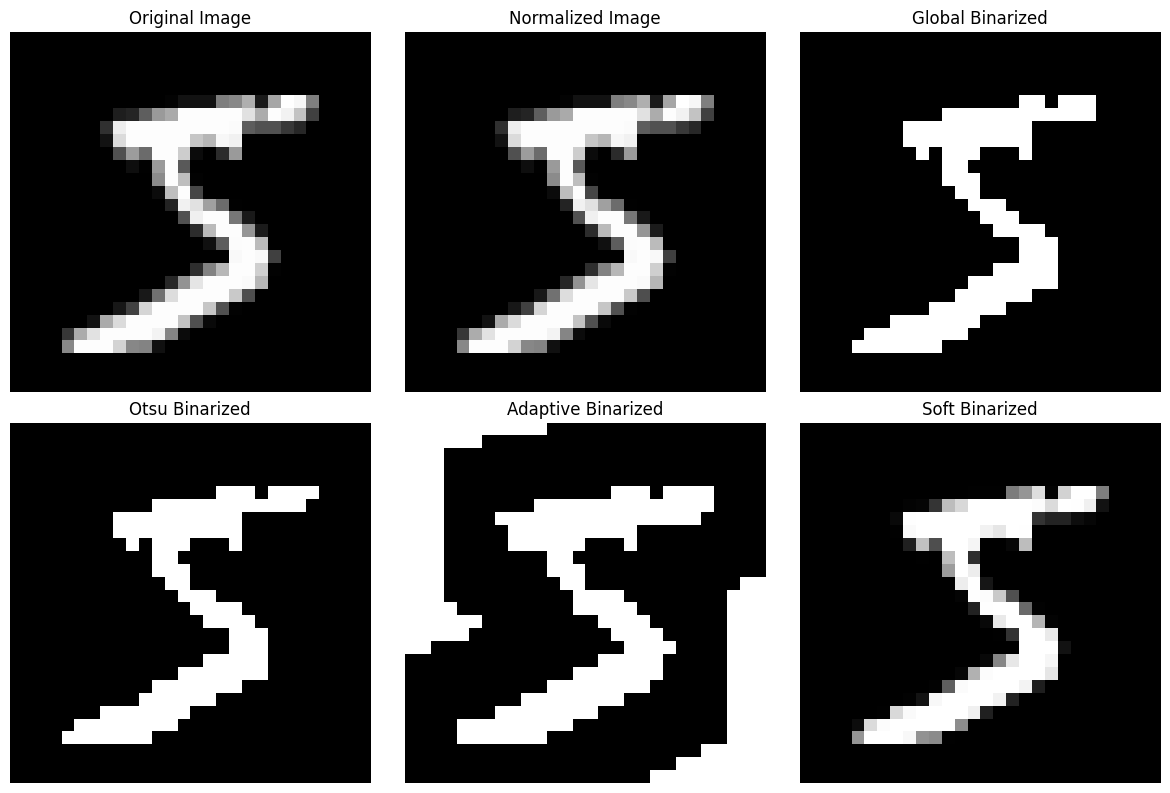

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import mnist

# 1. Load MNIST data
(train_images, _), (_, _) = mnist.load_data()

# Select one image for demonstration
image = train_images[0]

# 2. Normalize pixel values to [0, 1]
normalized_image = image / 255.0

# 3. Apply Binarization Techniques
# Option 1: Global Thresholding
threshold = 0.5
global_binarized = (normalized_image > threshold).astype(float)

# Option 2: Otsu's Thresholding (requires uint8 image)
_, otsu_binarized = cv2.threshold(
    (normalized_image * 255).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# Option 3: Adaptive Thresholding
adaptive_binarized = cv2.adaptiveThreshold(
    (normalized_image * 255).astype(np.uint8),
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=11,
    C=2,
)

# 4. Optional: Edge-Preserving Soft Binarization
soft_binarized = 1 / (1 + np.exp(-10 * (normalized_image - 0.5)))

# 5. Post-Processing: Morphological Operations
kernel = np.ones((2, 2), np.uint8)
refined_image = cv2.morphologyEx(global_binarized, cv2.MORPH_CLOSE, kernel)

# 6. Visualization: Compare Results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

# Normalized Image
plt.subplot(2, 3, 2)
plt.title("Normalized Image")
plt.imshow(normalized_image, cmap="gray")
plt.axis("off")

# Global Binarization
plt.subplot(2, 3, 3)
plt.title("Global Binarized")
plt.imshow(global_binarized, cmap="gray")
plt.axis("off")

# Otsu's Thresholding
plt.subplot(2, 3, 4)
plt.title("Otsu Binarized")
plt.imshow(otsu_binarized, cmap="gray")
plt.axis("off")

# Adaptive Thresholding
plt.subplot(2, 3, 5)
plt.title("Adaptive Binarized")
plt.imshow(adaptive_binarized, cmap="gray")
plt.axis("off")

# Soft Binarization
plt.subplot(2, 3, 6)
plt.title("Soft Binarized")
plt.imshow(soft_binarized, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


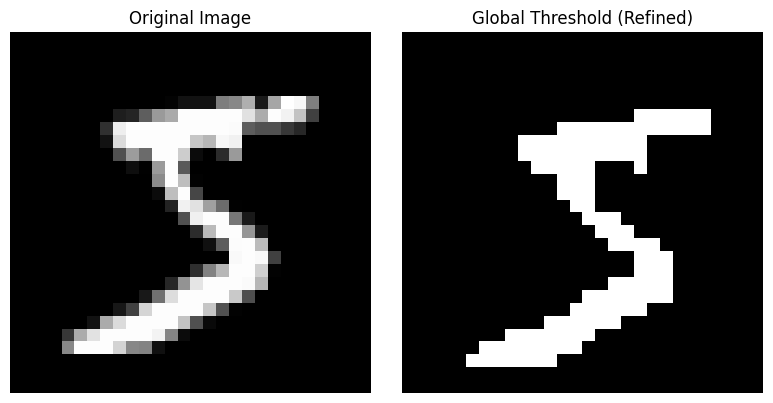

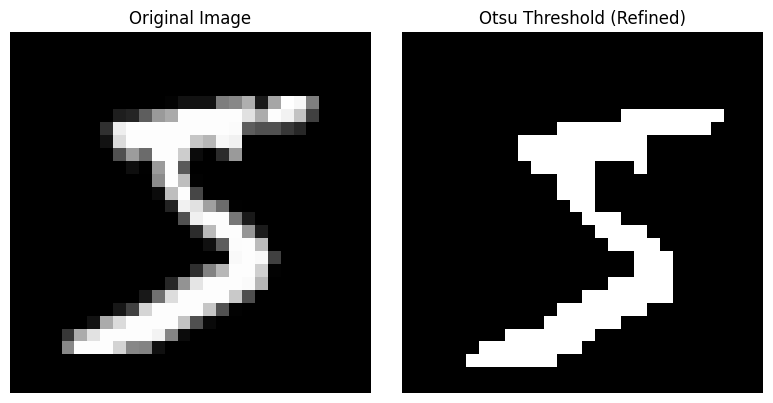

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import mnist

# 1. Load MNIST data
(train_images, _), (_, _) = mnist.load_data()

# 2. Normalize pixel values to [0, 1]
def normalize_image(image):
    return image / 255.0

# 3. Global Thresholding
def global_threshold(image, threshold=0.5):
    return (image > threshold).astype(float)

# 4. Otsu's Thresholding
def otsu_threshold(image):
    _, binarized_image = cv2.threshold(
        (image * 255).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    return binarized_image / 255.0

# 5. Post-Processing with Morphological Operations
def refine_binary_image(image):
    kernel = np.ones((2, 2), np.uint8)
    refined_image = cv2.morphologyEx(image.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
    return refined_image

# 6. Apply Binarization to the Entire Dataset
def binarize_dataset(images, method="global", threshold=0.5):
    binarized_images = []
    for img in images:
        normalized = normalize_image(img)
        if method == "global":
            binary = global_threshold(normalized, threshold)
        elif method == "otsu":
            binary = otsu_threshold(normalized)
        else:
            raise ValueError("Invalid method. Choose 'global' or 'otsu'.")

        # Refine the binary image (optional)
        refined = refine_binary_image(binary)
        binarized_images.append(refined)

    return np.array(binarized_images)

# 7. Visualize Results
def visualize_binarization(original, binarized, title):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(binarized, cmap="gray")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# 8. Example Usage
# Select one image for visualization
sample_image = train_images[0]

# Global Thresholding
global_binary = global_threshold(normalize_image(sample_image))
refined_global = refine_binary_image(global_binary)

# Otsu's Thresholding
otsu_binary = otsu_threshold(normalize_image(sample_image))
refined_otsu = refine_binary_image(otsu_binary)

# Visualize
visualize_binarization(sample_image, refined_global, "Global Threshold (Refined)")
visualize_binarization(sample_image, refined_otsu, "Otsu Threshold (Refined)")

# Apply binarization to the entire dataset
binarized_dataset = binarize_dataset(train_images, method="global")


In [ ]:
print(sample_image )

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(refined_otsu)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 

In [ ]:
print(refined_global )

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 

In [63]:
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.datasets import mnist
from numpy.fft import fft2, fftshift

# Step 1: Load MNIST data
(train_images, train_labels), (_, _) = mnist.load_data()

# Step 2: Normalize pixel values
def normalize_image(image):
    return image / 255.0

# Step 3: Global Thresholding
def global_threshold(image, threshold=0.5):
    return (image > threshold).astype(float)

# Step 4: Otsu's Thresholding
def otsu_threshold(image):
    _, binarized_image = cv2.threshold(
        (image * 255).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )
    return binarized_image / 255.0

# Step 5: Morphological Operations
def refine_binary_image(image):
    kernel = np.ones((2, 2), np.uint8)
    refined_image = cv2.morphologyEx(image.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
    return refined_image

# Step 6: Remove unnecessary pixels (empty rows and columns)
def remove_empty_rows_and_columns(image):
    row_mask = np.any(image > 0, axis=1)
    col_mask = np.any(image > 0, axis=0)
    return image[row_mask][:, col_mask]

# Step 7: Select 200 images per label
def select_images_by_label(images, labels, max_per_label=200):
    selected_images = []
    selected_labels = []
    counts = {i: 0 for i in range(10)}

    for img, lbl in zip(images, labels):
        if counts[lbl] < max_per_label:
            selected_images.append(img)
            selected_labels.append(lbl)
            counts[lbl] += 1
        if all(count >= max_per_label for count in counts.values()):
            break

    return np.array(selected_images), np.array(selected_labels)

# Filter to 200 images per label
filtered_images, filtered_labels = select_images_by_label(train_images, train_labels, max_per_label=200)

# Step 8: Fourier Coefficients Extraction
def extract_fourier_coefficients(image, keep_fraction=0.1):
    f_transform = fft2(image)
    f_shift = fftshift(f_transform)
    rows, cols = f_shift.shape
    crow, ccol = rows // 2, cols // 2  # Center
    keep_row, keep_col = int(rows * keep_fraction), int(cols * keep_fraction)
    mask = np.zeros_like(f_shift, dtype=bool)
    mask[crow - keep_row:crow + keep_row, ccol - keep_col:ccol + keep_col] = True
    low_freq_coefficients = f_shift[mask]
    return np.abs(low_freq_coefficients).flatten()

# Step 9: Process all selected images and create a data table
data_rows = []
max_pixels = 0
fourier_size = 10  # Number of Fourier coefficients to keep (can adjust this)

for img, label in zip(filtered_images, filtered_labels):
    normalized_img = normalize_image(img)
    global_thresh_img = global_threshold(normalized_img)
    otsu_thresh_img = otsu_threshold(normalized_img)
    refined_img = refine_binary_image(otsu_thresh_img)
    cropped_img = remove_empty_rows_and_columns(refined_img)

    # Update max_pixels to ensure all rows have consistent length
    max_pixels = max(max_pixels, cropped_img.size)

    # Flatten cropped image and store along with label
    flattened_pixels = cropped_img.flatten()

    # Step 10: Extract Fourier coefficients
    fourier_coeffs = extract_fourier_coefficients(cropped_img, keep_fraction=0.1)

    # Check if Fourier coefficients have more than `fourier_size`
    if len(fourier_coeffs) > fourier_size:
        fourier_coeffs = fourier_coeffs[:fourier_size]  # Truncate to fit the desired size
    elif len(fourier_coeffs) < fourier_size:
        fourier_coeffs = np.pad(fourier_coeffs, (0, fourier_size - len(fourier_coeffs)), 'constant')  # Pad if too short

    # Step 11: Categorize Fourier coefficients (binary classification)
    threshold = np.median(fourier_coeffs)  # Median value as threshold
    binary_fourier_coeffs = np.where(fourier_coeffs > threshold, 1, 0)  # 1 if above threshold, else 0

    # Aggregate Fourier coefficients as a single value (binary)
    fourier_feature = np.max(binary_fourier_coeffs)  # Could also use mean or sum

    # Add the Fourier feature (binary) to the flattened pixel data
    data_rows.append((flattened_pixels, fourier_feature, label))

# Step 12: Ensure all rows have consistent dimensions by padding with zeros
final_data_rows = []
for row in data_rows:
    flattened_pixels, fourier_feature, label = row

    # Pad pixel data to consistent size
    padded_pixels = np.pad(flattened_pixels, (0, max_pixels - len(flattened_pixels)), 'constant')

    # Add the Fourier feature and label
    final_data_rows.append(np.append(padded_pixels, [fourier_feature, label]))

# Step 13: Create a DataFrame
data_columns = [f"pixel_{i}" for i in range(max_pixels)] + ["fourier_feature", "label"]
data_table = pd.DataFrame(final_data_rows, columns=data_columns)

# Step 14: Save the updated data table
data_table.to_csv("mnist_data_table_with_one_fourier_feature.csv", index=False)


In [64]:
data_table.head()

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        1        1   

   pixel_8  pixel_9  ...  pixel_412  pixel_413  pixel_414  pixel_415  \
0        0        0  ...          0          0          0          0   
1        0        1  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        1  ...          0          0          0          0   
4        1        1  ...          0          0          0          0   

   pixel_416  pixel_417  pixel_418  pixel_419  fourier_feature  label  
0          0          0          0          0                1      5  
1          0          0          0          0                1      0  
2          0          0          0          0                1      4  
3          0          0          0          0                1      1  
4          0          0          0          0                1      9  

[5 rows x 422 columns]

In [65]:
# Get all unique values in the 'fourier_feature' column
unique_fourier_values = data_table['fourier_feature'].unique()

# Print the unique values
print("Unique values in 'fourier_feature':", unique_fourier_values)


Unique values in 'fourier_feature': [1 0]


In [67]:
# Step 1: Binary encode the 'label' column
data_table['label'] = (data_table['label'] >= 5).astype(int)

# Step 2: Print the first few rows to verify the encoding
print(data_table.head())


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        1        1   

   pixel_8  pixel_9  ...  pixel_412  pixel_413  pixel_414  pixel_415  \
0        0        0  ...          0          0          0          0   
1        0        1  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        1  ...          0          0          0          0   
4        1        1  ...          0          0          0          0   

   pixel_416  pixel_417  pixel_418  pixel_419  fourier_feature  label  
0          0          0         

In [66]:
# # Step 1: One-hot encode the 'label' column
# data_table_encoded = pd.get_dummies(data_table, columns=['label'], prefix='label')

# # Step 2: Print the first few rows to verify the encoding
# print(data_table_encoded.head())


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        1        1   

   pixel_8  pixel_9  ...  label_0  label_1  label_2  label_3  label_4  \
0        0        0  ...    False    False    False    False    False   
1        0        1  ...     True    False    False    False    False   
2        0        0  ...    False    False    False    False     True   
3        0        1  ...    False     True    False    False    False   
4        1        1  ...    False    False    False    False    False   

   label_5  label_6  label_7  label_8  label_9  
0     True    False    False    False    False  


In [69]:
# Set 'Promo Code Used_Yes' as the index without modifying the original DataFrame
df_with_promo_code = data_table.set_index('fourier_feature', inplace=False)

# Display the first few rows of the modified DataFrame
df_with_promo_code.head()


pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  \
fourier_feature                                                         
1                      0        0        0        0        0        0   
1                      0        0        0        0        0        0   
1                      0        0        0        0        0        0   
1                      0        0        0        0        0        0   
1                      0        0        0        0        0        0   

                 pixel_6  pixel_7  pixel_8  pixel_9  ...  pixel_411  \
fourier_feature                                      ...              
1                      0        0        0        0  ...          0   
1                      0        0        0        1  ...          0   
1                      0        0        0        0  ...          0   
1                      0        0        0        1  ...          0   
1                      1        1        1        1  ...          0   

                 pixel_412  pixel_413  pixel_414  pixel_415  pixel_416  \
fourier_feature                                                          
1                        0          0          0          0          0   
1                        0          0          0          0          0   
1                        0          0          0          0          0   
1                        0          0          0          0          0   
1                        0          0          0          0          0   

                 pixel_417  pixel_418  pixel_419  label  
fourier_feature                                          
1                        0          0          0      1  
1                        0          0          0      0  
1                        0          0          0      0  
1                        0          0          0      0  
1                        0          0          0      1  

[5 rows x 421 columns]

In [70]:
df_boolean = df_with_promo_code.astype(bool)

# Display the first few rows of the transformed DataFrame
df_boolean.head()


pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  \
fourier_feature                                                         
1                  False    False    False    False    False    False   
1                  False    False    False    False    False    False   
1                  False    False    False    False    False    False   
1                  False    False    False    False    False    False   
1                  False    False    False    False    False    False   

                 pixel_6  pixel_7  pixel_8  pixel_9  ...  pixel_411  \
fourier_feature                                      ...              
1                  False    False    False    False  ...      False   
1                  False    False    False     True  ...      False   
1                  False    False    False    False  ...      False   
1                  False    False    False     True  ...      False   
1                   True     True     True     True  ...      False   

                 pixel_412  pixel_413  pixel_414  pixel_415  pixel_416  \
fourier_feature                                                          
1                    False      False      False      False      False   
1                    False      False      False      False      False   
1                    False      False      False      False      False   
1                    False      False      False      False      False   
1                    False      False      False      False      False   

                 pixel_417  pixel_418  pixel_419  label  
fourier_feature                                          
1                    False      False      False   True  
1                    False      False      False  False  
1                    False      False      False  False  
1                    False      False      False  False  
1                    False      False      False   True  

[5 rows x 421 columns]

In [71]:
df_boolean.index = df_boolean.index.astype(str)

In [73]:
from sklearn.model_selection import train_test_split
y_feat = 'label'
df_train, df_test = train_test_split(df_boolean, train_size=0.8, random_state=0)

X_train, y_train = df_train.drop(y_feat, axis=1), df_train[y_feat]
X_test, y_test = df_test.drop(y_feat, axis=1), df_test[y_feat]
X_train.sample()

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  \
fourier_feature                                                         
1                  False    False    False    False     True     True   

                 pixel_6  pixel_7  pixel_8  pixel_9  ...  pixel_410  \
fourier_feature                                      ...              
1                   True     True    False    False  ...      False   

                 pixel_411  pixel_412  pixel_413  pixel_414  pixel_415  \
fourier_feature                                                          
1                    False      False      False      False      False   

                 pixel_416  pixel_417  pixel_418  pixel_419  
fourier_feature                                              
1                    False      False      False      False  

[1 rows x 420 columns]

In [74]:

K_train = FormalContext.from_pandas(X_train)
K_train

FormalContext (1600 objects, 420 attributes, 176623 connections)
 |pixel_0|pixel_1|pixel_2|pixel_3|pixel_4|...|pixel_415|pixel_416|pixel_417|pixel_418|pixel_419|
1|       |       |       |       |      X|...|         |         |         |         |         |
1|       |       |       |       |       |...|         |         |         |         |         |
1|       |       |       |       |       |...|         |         |         |         |         |
1|       |       |       |       |       |...|         |         |         |         |         |
0|       |       |       |       |      X|...|         |         |         |         |         |
1|       |       |       |       |       |...|         |         |         |         |         |
1|       |       |       |       |       |...|         |         |         |         |         |
0|       |       |       |       |      X|...|         |         |         |         |         |
1|       |       |       |       |      X|...|         |      

In [75]:
L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)
len(L)

102

In [76]:
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)
    c.measures['recall_score'] = recall_score(y_train, y_preds)

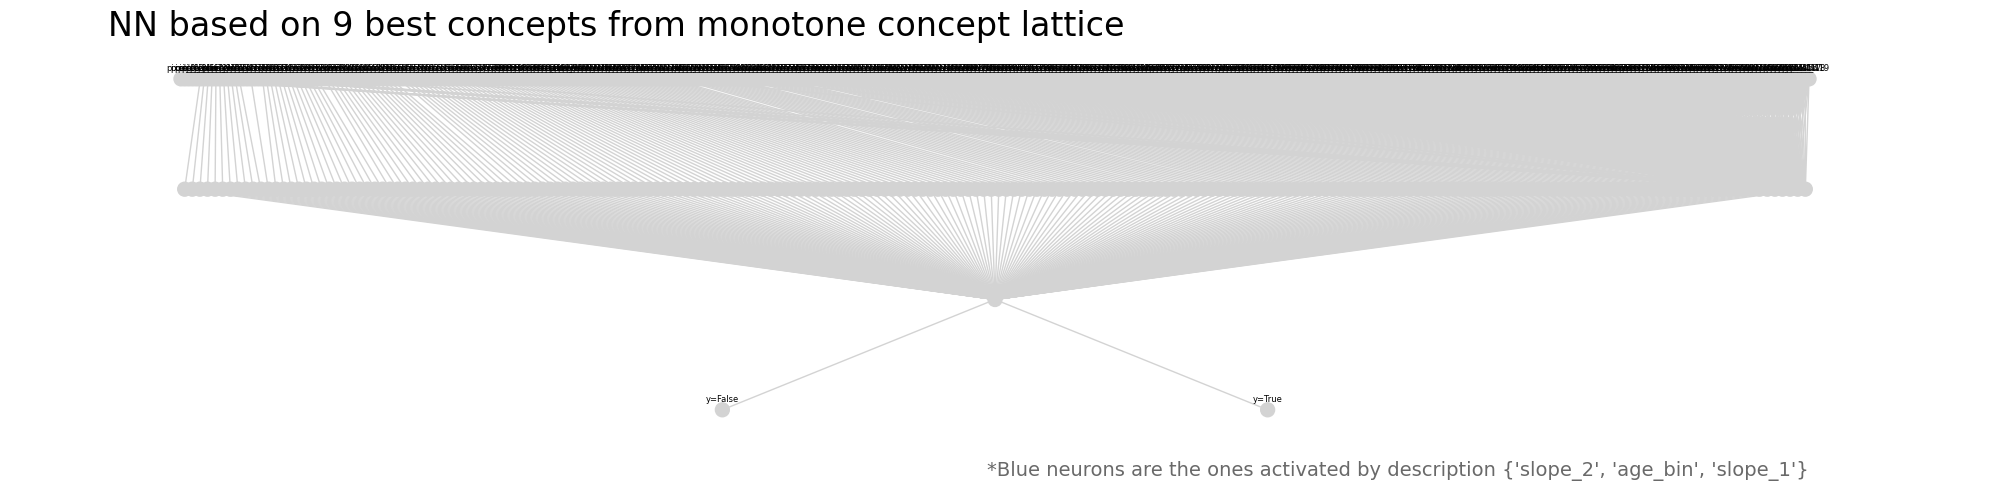


### Results for n_concepts=9, n_epochs=2000 ###

Class prediction: [0 0 0 1 0 0 0 1 0 1]
Class prediction with probabilities: [[0.93396765 0.06603231]
 [0.93396765 0.06603231]
 [0.93396765 0.06603231]
 [0.00368469 0.9963153 ]
 [0.93396765 0.06603231]
 [0.93396765 0.06603231]
 [0.93396765 0.06603231]
 [0.06351225 0.9364878 ]
 [0.93396765 0.06603231]
 [0.03754061 0.9624593 ]]
True class: [False  True False False False False False  True  True  True]
Recall score: 0.6684782608695652
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       216
           1       0.64      0.67      0.66       184

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400

F1 score: 0.656
Accuracy score: 0.6775


In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl
from sklearn.metrics import f1_score
# Description for tracing
descr = {'age_bin', 'slope_1', 'slope_2'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 9
n_epochs = 2000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

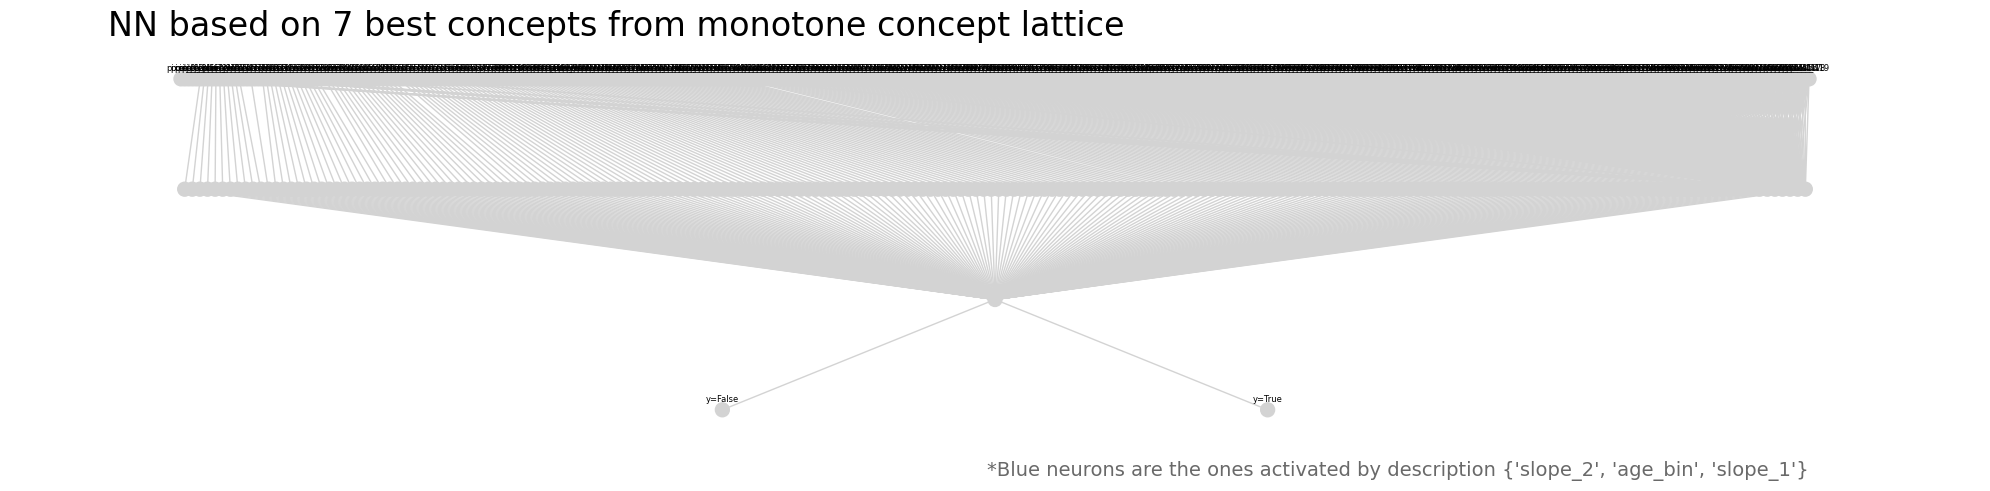


### Results for n_concepts=7, n_epochs=5000 ###

Class prediction: [1 1 1 1 1 1 1 1 1 1]
Class prediction with probabilities: [[0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]
 [0.47999746 0.5200026 ]]
True class: [False  True False False False False False  True  True  True]
Recall score: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.46      1.00      0.63       184

    accuracy                           0.46       400
   macro avg       0.23      0.50      0.32       400
weighted avg       0.21      0.46      0.29       400

F1 score: 0.6301369863013698
Accuracy score: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl
from sklearn.metrics import f1_score
# Description for tracing
descr = {'age_bin', 'slope_1', 'slope_2'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 7
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

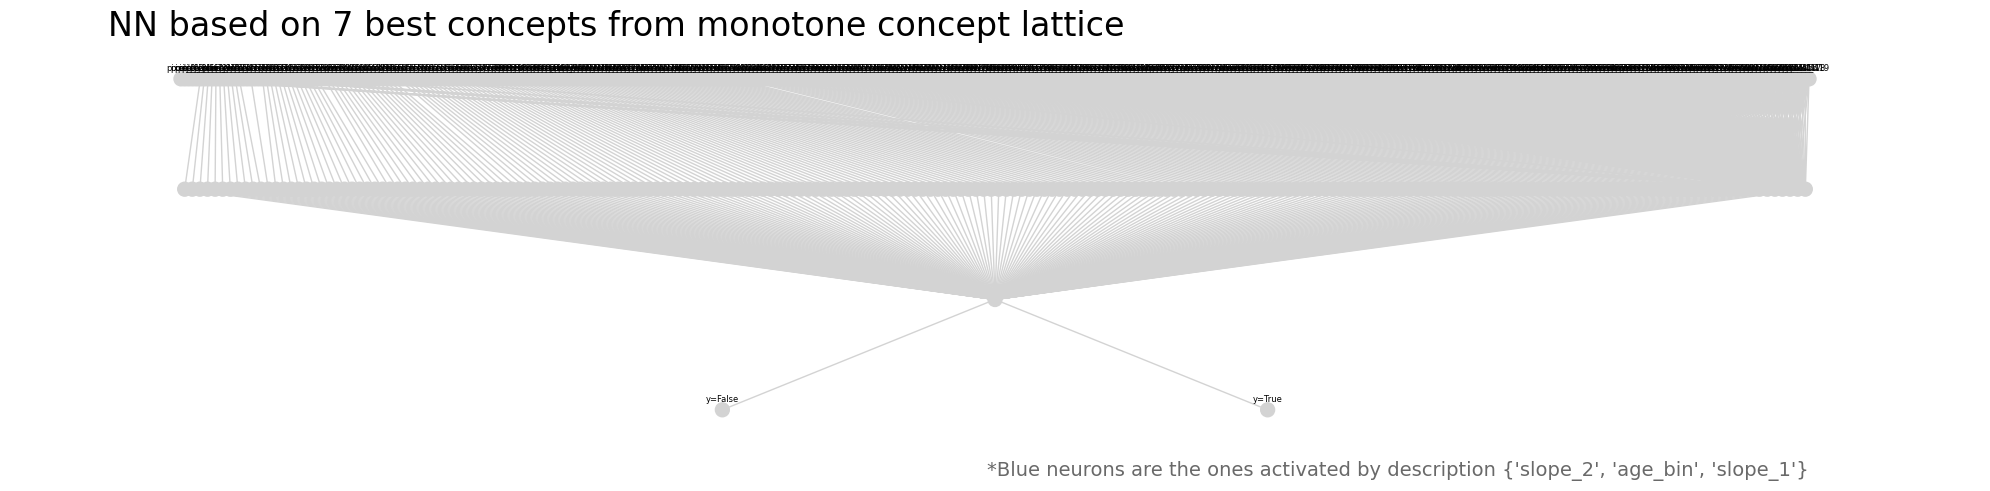


### Results for n_concepts=7, n_epochs=1000 ###

Class prediction: [1 1 1 1 1 1 1 1 1 1]
Class prediction with probabilities: [[0.48049843 0.51950157]
 [0.48049843 0.51950157]
 [0.48049843 0.51950157]
 [0.48049843 0.51950157]
 [0.48049843 0.51950157]
 [0.48049843 0.51950157]
 [0.48049843 0.51950157]
 [0.48049843 0.51950157]
 [0.48049843 0.51950157]
 [0.48049843 0.51950157]]
True class: [False  True False False False False False  True  True  True]
Recall score: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.46      1.00      0.63       184

    accuracy                           0.46       400
   macro avg       0.23      0.50      0.32       400
weighted avg       0.21      0.46      0.29       400

F1 score: 0.6301369863013698
Accuracy score: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl
from sklearn.metrics import f1_score
# Description for tracing
descr = {'age_bin', 'slope_1', 'slope_2'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 7
n_epochs = 1000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

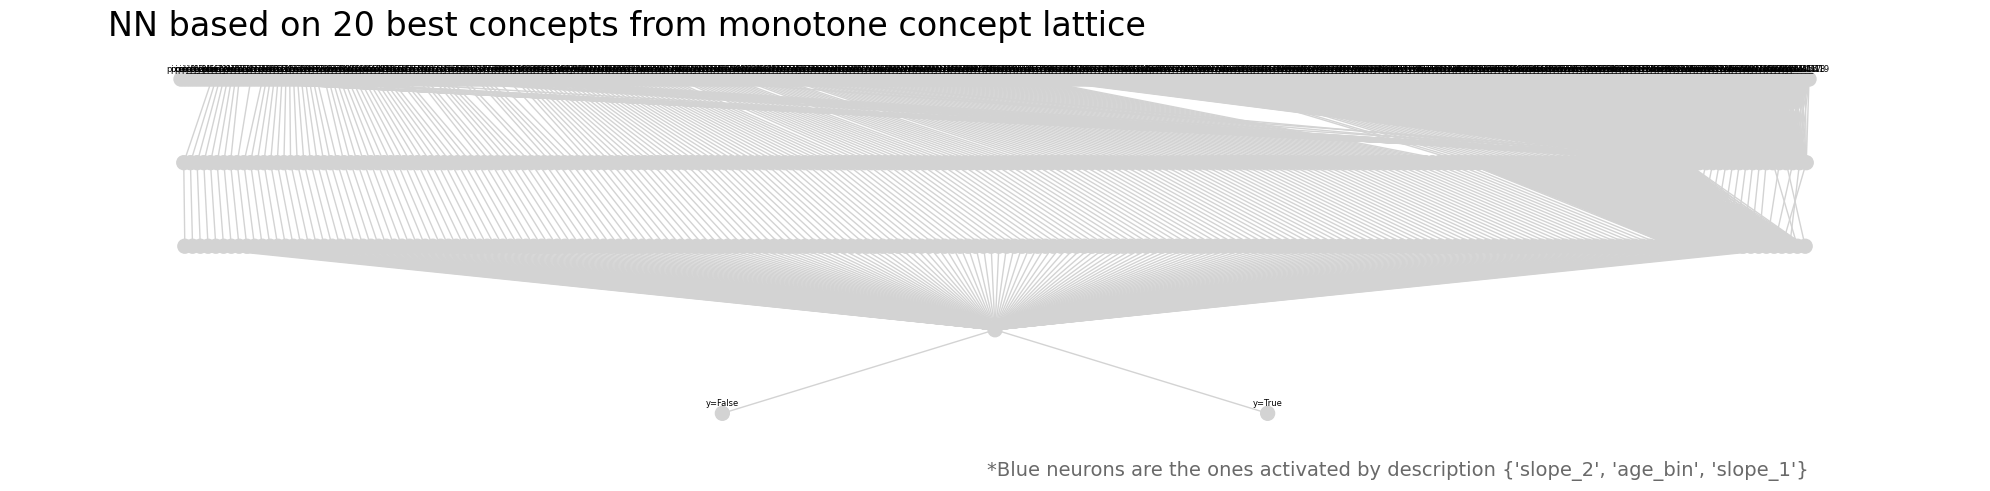


### Results for n_concepts=20, n_epochs=5000 ###

Class prediction: [1 1 1 1 1 1 1 1 1 1]
Class prediction with probabilities: [[0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]
 [0.47999743 0.5200026 ]]
True class: [False  True False False False False False  True  True  True]
Recall score: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.46      1.00      0.63       184

    accuracy                           0.46       400
   macro avg       0.23      0.50      0.32       400
weighted avg       0.21      0.46      0.29       400

F1 score: 0.6301369863013698
Accuracy score: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, classification_report, f1_score, accuracy_score
import neural_lib as nl
from sklearn.metrics import f1_score
# Description for tracing
descr = {'age_bin', 'slope_1', 'slope_2'}

# Case 1: n_concepts = 4, n_epochs = 5000
n_concepts = 20
n_epochs = 5000
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, \
    "Selected concepts do not cover all train objects"

cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
traced = cn.trace_description(descr, include_targets=False)

fig, ax = plt.subplots(figsize=(20, 5))
vis = LineVizNx(
    node_label_font_size=14,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n'
)
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    node_size=100,
    node_label_font_size=6
)
plt.title(f'NN based on {n_concepts} best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3,
         f'*Blue neurons are the ones activated by description {descr}',
         fontsize=14, ha='right', color='dimgray')
plt.subplots_adjust()
plt.tight_layout()
plt.savefig(f'nn_g_and_b_{n_concepts}.png')
plt.show()

cn.fit(X_train, y_train, n_epochs=n_epochs)
y_pred = cn.predict(X_test).numpy()
y_proba = cn.predict_proba(X_test).detach().numpy()

print(f"\n### Results for n_concepts={n_concepts}, n_epochs={n_epochs} ###\n")
print('Class prediction:', y_pred[:10])
print('Class prediction with probabilities:', y_proba[:10])
print('True class:', y_test.values[:10])
print('Recall score:', recall_score(y_test.values.astype('int'), y_pred))
print(classification_report(y_test.values.astype('int'), y_pred))
print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))